In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/kaggle/input/casestudydataset/Talent_Academy_Case_DT_2025.xlsx")

In [70]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [71]:
print(f"Veri seti boyutu: {df.shape[0]} satır, {df.shape[1]} sütun.")
df.info()

Veri seti boyutu: 2235 satır, 13 sütun.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [72]:
print(df.describe())
print(df.describe(include=['object']).T)

             HastaNo          Yas
count    2235.000000  2235.000000
mean   145333.100224    47.327069
std       115.214248    15.208634
min    145134.000000     2.000000
25%    145235.000000    38.000000
50%    145331.000000    46.000000
75%    145432.000000    56.000000
max    145537.000000    92.000000
                count unique                                             top  \
Cinsiyet         2066      2                                           Kadın   
KanGrubu         1560      8                                           0 Rh+   
Uyruk            2235      5                                         Türkiye   
KronikHastalik   1624    220                                Myastenia gravis   
Bolum            2224     10  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
Alerji           1291     38                                           Polen   
Tanilar          2160    367              DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE   
TedaviAdi        2235    244                          

# İlk Adım

### 1- Kolon isimleri güncellenecek
### 2- "Seans" ve "Dakika" ifadeleri satırardan silinecek
### 3- Tamamen aynı olan satırlar silinecek (ps: Normal koşullarda aynı hasta aynı hastalık için aynı tedaviyi almaya defalarca gelebilir ancak burda bu durumu kıyaslayabileceğimiz bir tarih verisi olmadığı için kayıtlı satırları duplice olarak değerlendiriyoruz)
### 4- tüm string değerler lower olacak
### 5- Eksik veri olan satırlara "nan" değer atanacak

In [73]:
#1- kolon isimleri daha uygun olmalı

df = df.rename(columns={
    "HastaNo": "hasta_no",
    "Yas": "yas",
    "Cinsiyet": "cinsiyet",
    "KanGrubu": "kan_grubu",
    "Uyruk": "uyruk",
    "KronikHastalik": "kronik_hastalik",
    "Bolum": "bolum",
    "Alerji": "alerji",
    "Tanilar": "tanilar",
    "TedaviAdi": "tedavi_adi",
    "TedaviSuresi": "tedavi_seans_sayisi",
    "UygulamaYerleri": "uygulama_yeri",
    "UygulamaSuresi": "seans_suresi_dk"
})

In [74]:
# 2- "Dakika" ve "Seans" ifadelerini temizlemek 

df["tedavi_seans_sayisi"] = df["tedavi_seans_sayisi"].str.replace("Seans", "", regex=False)
df["seans_suresi_dk"] = df["seans_suresi_dk"].str.replace("Dakika", "", regex=False)

# 2) Sağlı sollu boşlukları temizle
df["tedavi_seans_sayisi"] = df["tedavi_seans_sayisi"].str.strip()
df["seans_suresi_dk"] = df["seans_suresi_dk"].str.strip()

# 3) Integer’a çevir
df["tedavi_seans_sayisi"] = df["tedavi_seans_sayisi"].astype(int)
df["seans_suresi_dk"] = df["seans_suresi_dk"].astype(int)

In [75]:
#3- Duplice satır var mı varsa sil
# 1. Tüm satırlara göre duplicate olanları işaretle
mask = df.duplicated()

# 2. Kaç tane duplicate var (tamamen aynı olan satır sayısı)
duplicate_count = mask.sum()
print("Tamamen aynı olan satır sayısı:", duplicate_count)

# 3. Duplice satırları sil
df_unique = df.drop_duplicates()

Tamamen aynı olan satır sayısı: 928


In [76]:
df_unique.shape[0] + 928

2235

In [77]:
#Kategorik kolonları seç

cat_cols = [
    "cinsiyet",
    "kan_grubu",
    "uyruk",
    "kronik_hastalik",
    "bolum",
    "alerji",
    "tanilar",
    "tedavi_adi",
    "uygulama_yeri"
]

In [78]:
#Küçük harfe dönüşümü
for col in cat_cols:
    df_unique.loc[:, col] = df_unique[col].str.lower()

# Kategorik kolonları gözlemleme

In [79]:
print("--- Kategorik Kolonların Benzersiz Değerleri ---")
for col in cat_cols:
    print(f"--- {col} örnekleri---")
    
    unique_values = df_unique[col].unique()
    print(unique_values[:20])
    
    print(f"Toplam unique: {df_unique[col].nunique()}")
    print("-" * 20)

--- Kategorik Kolonların Benzersiz Değerleri ---
--- cinsiyet örnekleri---
['kadın' 'erkek' nan]
Toplam unique: 2
--------------------
--- kan_grubu örnekleri---
['0 rh+' 'a rh+' 'b rh+' 'b rh-' 'ab rh+' nan 'a rh-' '0 rh-' 'ab rh-']
Toplam unique: 8
--------------------
--- uyruk örnekleri---
['türkiye' 'tokelau' 'azerbaycan' 'libya' 'arnavutluk']
Toplam unique: 5
--------------------
--- kronik_hastalik örnekleri---
['becker musküler distrofisi, hiportiroidizm, kalp yetmezliği'
 'duchenne musküler distrofisi, myastenia gravis, becker musküler distrofisi, hipertansiyon'
 nan
 'hiportiroidizm, diyabet, duchenne musküler distrofisi, kalp yetmezliği'
 'hiportiroidizm, fascioscapulohumeral distrofi, duchenne musküler distrofisi, diyabet'
 'diyabet, myastenia gravis, aritmi' 'diyabet' 'kalp yetmezliği'
 'limb-girdle musküler distrofi, duchenne musküler distrofisi, becker musküler distrofisi'
 'aritmi' 'myastenia gravis, diyabet' 'kalp yetmezliği, astım'
 'kalp yetmezliği,astım'
 'duchenne 

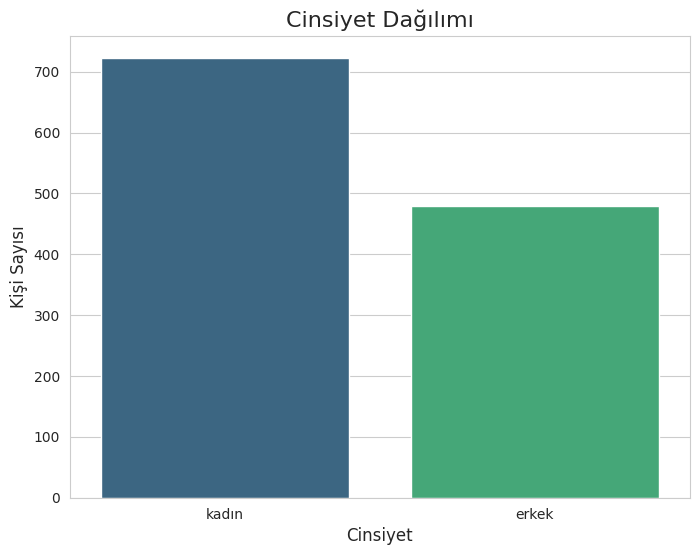

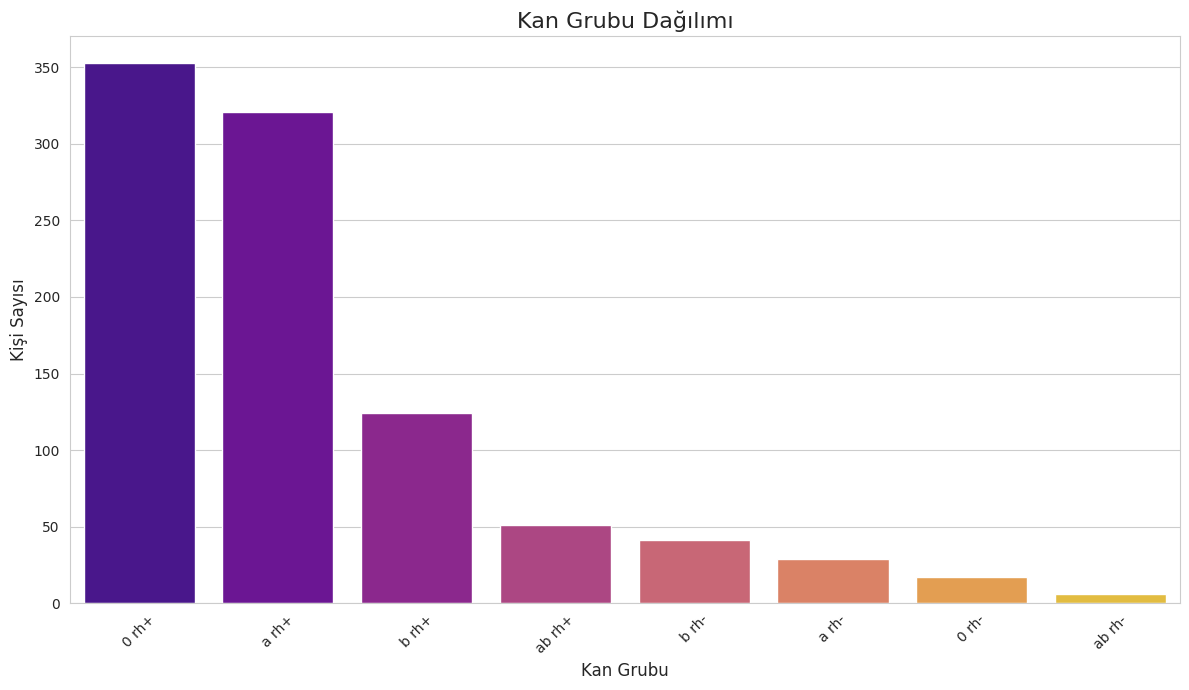

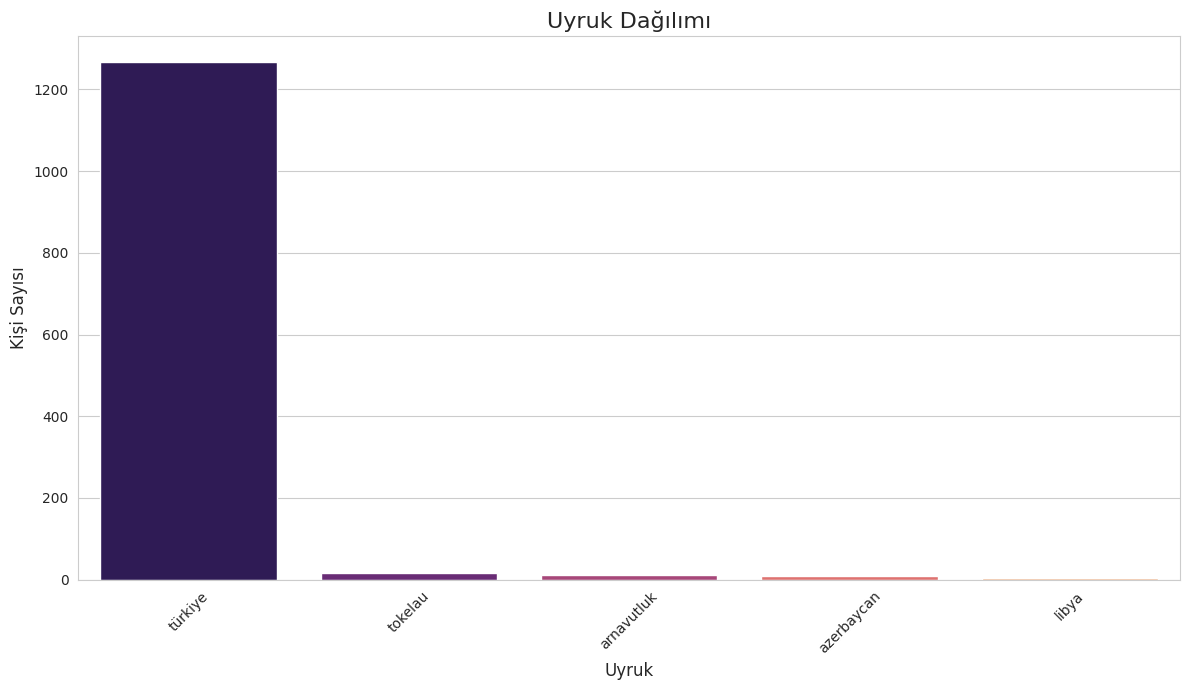

In [80]:


cinsiyet_dagilimi = df_unique['cinsiyet'].value_counts()
kan_grubu_dagilimi = df_unique['kan_grubu'].value_counts()
uyruk_dagilimi = df_unique['uyruk'].value_counts()

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Grafik 1: Cinsiyet Dağılımı
plt.figure(figsize=(8, 6)) 
sns.barplot(x=cinsiyet_dagilimi.index, y=cinsiyet_dagilimi.values, palette='viridis')
plt.title('Cinsiyet Dağılımı', fontsize=16)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)

plt.show()

# Grafik 2: Kan Grubu Dağılımı
plt.figure(figsize=(12, 7)) # Grafik boyutunu ayarla
sns.barplot(x=kan_grubu_dagilimi.index, y=kan_grubu_dagilimi.values, palette='plasma')
plt.title('Kan Grubu Dağılımı', fontsize=16)
plt.xlabel('Kan Grubu', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

plt.figure(figsize=(12, 7)) # Grafik boyutunu ayarla
sns.barplot(x=uyruk_dagilimi.index, y=uyruk_dagilimi.values, palette='magma')
plt.title('Uyruk Dağılımı', fontsize=16)
plt.xlabel('Uyruk', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [81]:
df_unique.isnull().sum()

hasta_no                 0
yas                      0
cinsiyet               104
kan_grubu              365
uyruk                    0
kronik_hastalik        345
bolum                    7
alerji                 540
tanilar                 46
tedavi_adi               0
tedavi_seans_sayisi      0
uygulama_yeri          157
seans_suresi_dk          0
dtype: int64

# Karmaşık olmayan kolonlar için Eksik değer yönetimi

In [82]:
# Alerji ve kronik hastalık kişlerde bulunmayabilir. Daha sonra kronik hastalık konusunda daha derin irdeleme yaparız.

df_unique = df_unique.fillna({
    'alerji': 'Yok',
    'kronik_hastalik': 'Yok',
})

In [83]:
#Normal koşullarda mod değer ile doldurulabilirdi ama bilmeme durumunu korumak ve belirtmek istedim
# Cinsiyet ve Kan grubu kolonundaki NaN değerleri 'Bilinmiyor' kategorisi ile dolduruluyot
df_unique['cinsiyet'].fillna('Bilinmiyor', inplace=True)

df_unique['kan_grubu'].fillna('Bilinmiyor', inplace=True)

/tmp/ipykernel_36/1436582635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unique['cinsiyet'].fillna('Bilinmiyor', inplace=True)
/tmp/ipykernel_36/1436582635.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [84]:
df_unique.replace(r'^\s*$', np.nan, regex=True)

,hasta_no,yas,cinsiyet,kan_grubu,uyruk,kronik_hastalik,bolum,alerji,tanilar,tedavi_adi,tedavi_seans_sayisi,uygulama_yeri,seans_suresi_dk
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hiportiroidizm, ka...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,5,ayak bileği,20
1,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",Yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,boyun,20
2,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",Yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,"boyun,sırt",20
3,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",Yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,boyun,5
6,145136,60,erkek,0 rh+,türkiye,Yok,"fiziksel tıp ve rehabilitasyon,solunum merkezi","polen,novalgin",parapleji ve tetrapleji,parapleji,10,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,145536,48,erkek,Bilinmiyor,türkiye,"aritmi, myastenia gravis, fascioscapulohumeral...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,15,sol el bilek bölgesi,20
2230,145536,48,erkek,Bilinmiyor,türkiye,"aritmi, myastenia gravis, fascioscapulohumeral...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,15,sol el bilek bölgesi,10
2232,145537,33,kadın,a rh+,türkiye,Yok,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,​algonörodistrofi,​ ay...",aşil rüptürü rehabilitasyonu,15,sol ayak bileği bölgesi,20
2233,145537,33,kadın,a rh+,türkiye,Yok,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,algonörodistrofi, ayak...",aşil rüptürü rehabilitasyonu,15,sol ayak bileği bölgesi,15


# numerik kolonları gözlemleme

## aykırı değer
## veri dağılımı
## korelasyon

In [85]:
print(df_unique.describe())

            hasta_no          yas  tedavi_seans_sayisi  seans_suresi_dk
count    1307.000000  1307.000000          1307.000000      1307.000000
mean   145333.183627    47.291507            14.231064        14.335119
std       116.078536    15.424070             4.153470         7.250982
min    145134.000000     2.000000             1.000000         3.000000
25%    145233.000000    38.000000            15.000000         5.000000
50%    145330.000000    46.000000            15.000000        20.000000
75%    145434.500000    56.000000            15.000000        20.000000
max    145537.000000    92.000000            37.000000        45.000000


In [86]:
num_cols = df_unique.select_dtypes(include=['int64', 'float64']).columns
print("Sayısal kolonlar:", num_cols)

Sayısal kolonlar: Index(['hasta_no', 'yas', 'tedavi_seans_sayisi', 'seans_suresi_dk'], dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


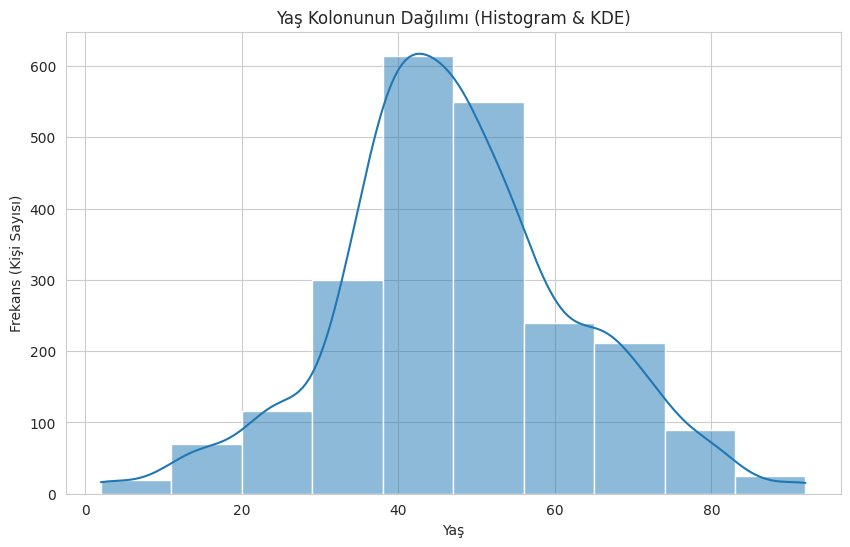

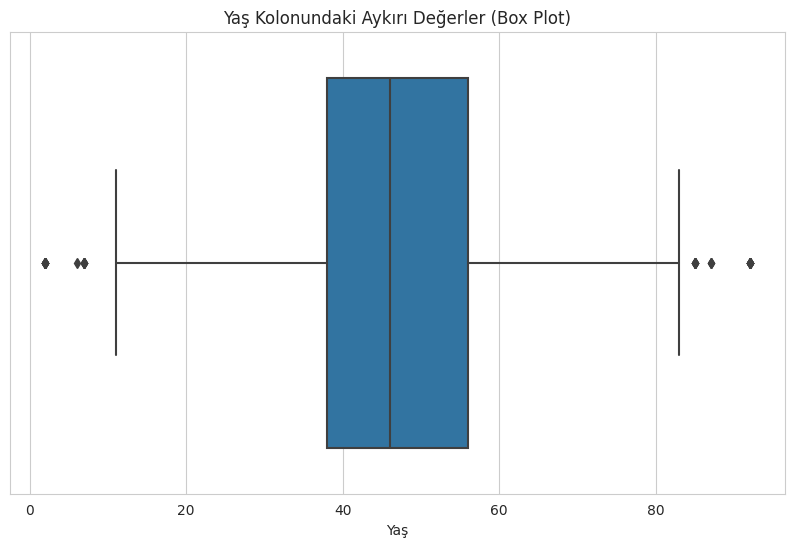

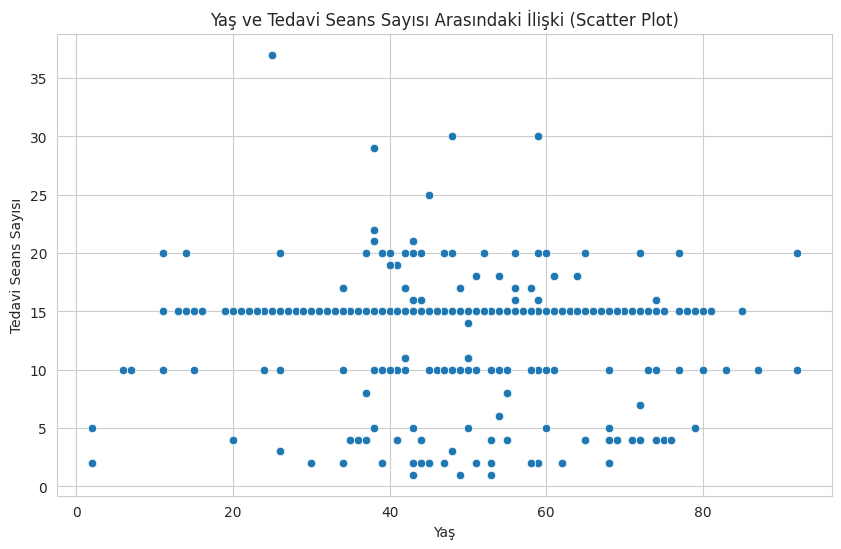

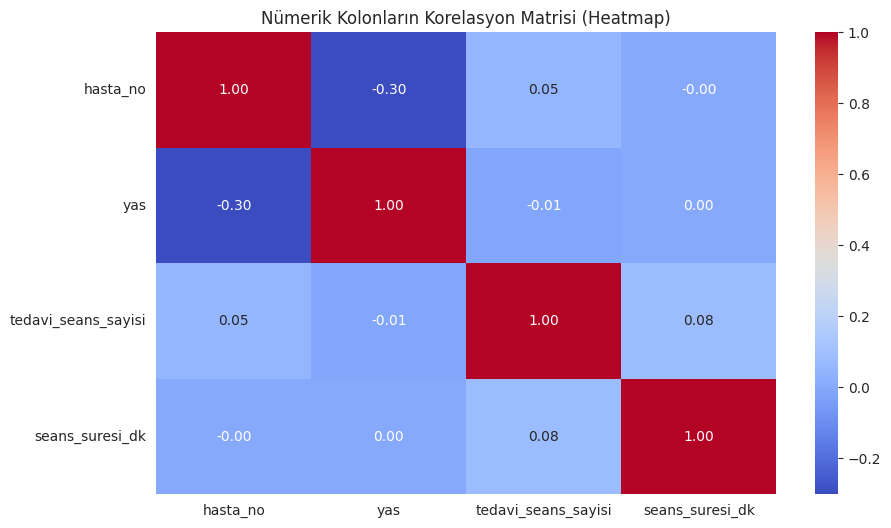

In [87]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

plt.figure()
sns.histplot(df['yas'], kde=True, bins=10)
plt.title('Yaş Kolonunun Dağılımı (Histogram & KDE)')
plt.xlabel('Yaş')
plt.ylabel('Frekans (Kişi Sayısı)')
plt.show()

plt.figure()
sns.boxplot(x=df['yas'])
plt.title('Yaş Kolonundaki Aykırı Değerler (Box Plot)')
plt.xlabel('Yaş')
plt.show()

plt.figure()
sns.scatterplot(x='yas', y='tedavi_seans_sayisi', data=df)
plt.title('Yaş ve Tedavi Seans Sayısı Arasındaki İlişki (Scatter Plot)')
plt.xlabel('Yaş')
plt.ylabel('Tedavi Seans Sayısı')
plt.show()

# Tüm Değişkenler Arasındaki İlişki: Korelasyon Isı Haritası
plt.figure()
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Nümerik Kolonların Korelasyon Matrisi (Heatmap)')
plt.show()

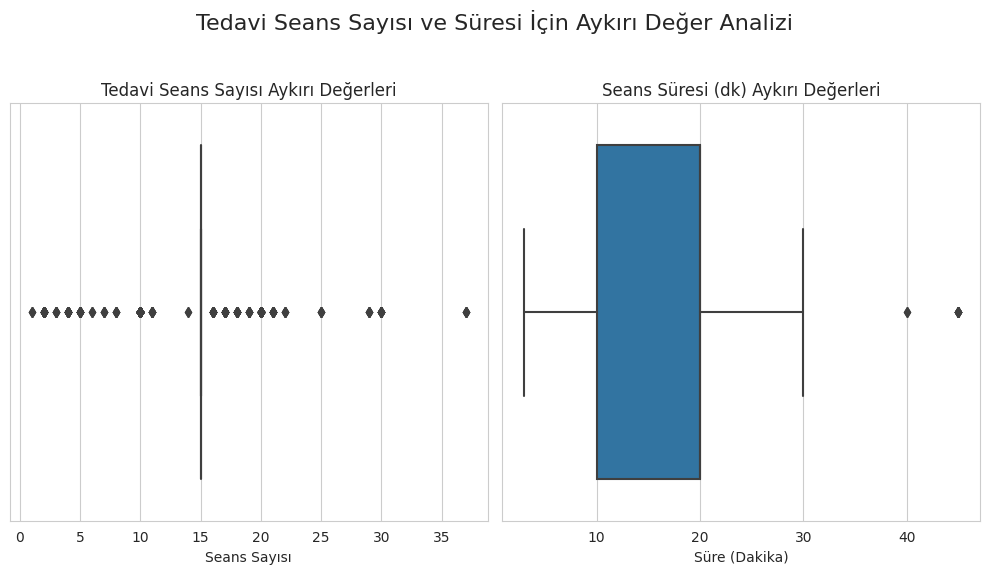

In [88]:
# İki grafiği yan yana çizdirmek için bir figür ve eksenler oluşturalım
fig, axes = plt.subplots(1, 2)

fig.suptitle('Tedavi Seans Sayısı ve Süresi İçin Aykırı Değer Analizi', fontsize=16)

# Grafik 1: Tedavi Seans Sayısı
sns.boxplot(x=df['tedavi_seans_sayisi'], ax=axes[0])
axes[0].set_title('Tedavi Seans Sayısı Aykırı Değerleri')
axes[0].set_xlabel('Seans Sayısı')

# Grafik 2: Seans Süresi (dk)
sns.boxplot(x=df['seans_suresi_dk'], ax=axes[1])
axes[1].set_title('Seans Süresi (dk) Aykırı Değerleri')
axes[1].set_xlabel('Süre (Dakika)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Başlığın sıkışmasını engelle
plt.show()

# Veri Temizliği

Bu noktada yazım hataları, mantıksal olarak hatalı bilgiler gibi süreci etkileyecek veriler temizlenip düzenlenecektir.

In [89]:
#uyruk kolonunda türkiye dışındakilerin sayısı az bu sebeple türkiye ve diğerleri olarak ayıralım
# Türkiye dışındakileri 'Diğer' yap
df_unique["uyruk_cleaned"] = df_unique["uyruk"].apply(lambda x: "türkiye" if x == "türkiye" else "diğer")

# Bolum Kolonu Veri temizliği

In [90]:

print("--- bolum ---")
print(df_unique["bolum"].value_counts(dropna=False))

--- bolum ---
bolum
fiziksel tıp ve rehabilitasyon,solunum merkezi    1157
ortopedi ve travmatoloji                            78
i̇ç hastalıkları                                    22
nöroloji                                            13
kardiyoloji                                          9
NaN                                                  7
genel cerrahi                                        5
laboratuar                                           5
göğüs hastalıkları                                   5
tıbbi onkoloji                                       4
kalp ve damar cerrahisi                              2
Name: count, dtype: int64


In [91]:
#kolonun ihtiyaç duyduğu düzenlemeleri keşfetmek amacıyla
benzersiz_bolumler = df_unique['bolum'].unique()

print("Bölünmemiş benzersiz bölümler:")
for bolum in benzersiz_bolumler:
    print(bolum)

Bölünmemiş benzersiz bölümler:
fiziksel tıp ve rehabilitasyon,solunum merkezi
i̇ç hastalıkları
ortopedi ve travmatoloji
kardiyoloji
nan
kalp ve damar cerrahisi
genel cerrahi
tıbbi onkoloji
göğüs hastalıkları
nöroloji
laboratuar


In [92]:
mapping = {
    'i̇ç hastalıkları': 'iç hastalıkları',
    'laboratuar': np.nan,
    'fiziksel tıp ve rehabilitasyon,solunum merkezi': 'fiziksel tıp ve rehabilitasyon',
    # kalp-damar cerrahisi ve kardiyoloji birleştirilebilir
    #iç hastalıkalrı ve genel cerrahide birleştirilebilir belki ama cerrahi ve non invazif alanların ayrımı önemli olabilir
}

def normalize_bolum(s):
    """
    Belirtilen kurallara göre 'bolum' değerlerini temizler ve standartlaştırır.
    """
    if pd.isna(s) or s is None or s == 'yok':
        return np.nan
        
    s = s.strip().lower()

    return mapping.get(s, s)

df_unique['bolum_cleaned'] = df_unique['bolum'].apply(normalize_bolum)

print(df_unique['bolum_cleaned'].value_counts(dropna=False))

bolum_cleaned
fiziksel tıp ve rehabilitasyon    1157
ortopedi ve travmatoloji            78
iç hastalıkları                     22
nöroloji                            13
NaN                                 12
kardiyoloji                          9
göğüs hastalıkları                   5
genel cerrahi                        5
tıbbi onkoloji                       4
kalp ve damar cerrahisi              2
Name: count, dtype: int64


In [93]:

grup = df_unique.groupby('bolum_cleaned')['seans_suresi_dk']

# Ortalama ve hasta sayısını hesapla
istatistik = grup.agg(
    ortalama_tedavi_suresi='mean',
    hasta_sayisi='count'
).reset_index()

print(istatistik)

                    bolum_cleaned  ortalama_tedavi_suresi  hasta_sayisi
0  fiziksel tıp ve rehabilitasyon               14.408816          1157
1                   genel cerrahi               17.000000             5
2              göğüs hastalıkları               15.000000             5
3                 iç hastalıkları               15.681818            22
4         kalp ve damar cerrahisi               17.500000             2
5                     kardiyoloji               21.111111             9
6                        nöroloji               16.923077            13
7        ortopedi ve travmatoloji               11.025641            78
8                  tıbbi onkoloji               15.000000             4


# Alerji Kolonu Veri temizliği

In [94]:
benzersiz_alerjiler = df_unique['alerji'].dropna().unique()

print("Bölünmemiş benzersiz alerji:")
for alerji in benzersiz_alerjiler:
    print(alerji)

Bölünmemiş benzersiz alerji:
toz
Yok
polen,novalgin
novalgin
polen
polen,yer fıstığı
toz,novalgin
sucuk
volteren
arveles,coraspin
voltaren,toz
polen,toz
gri̇pi̇n
voltaren
toz,toz
novalgin,novalgin
toz,polen
toz,gri̇pi̇n
sucuk,gripin
novalgin,sucuk
voltaren,polen
gripin
novalgin,polen
polen,voltaren
polen,gripin
volteren,gri̇pi̇n
toz,voltaren


In [95]:

alerjiler = df_unique['alerji'].str.strip()
split_list = []
for item in alerjiler:
    split_list.extend([x.strip().lower() for x in item.split(',')])


unique_allergies = set(split_list)

print("Farklı alerjiler (unique):")
print(unique_allergies)

Farklı alerjiler (unique):
{'voltaren', 'yer fıstığı', 'volteren', 'toz', 'novalgin', 'gripin', 'coraspin', 'yok', 'gri̇pi̇n', 'polen', 'arveles', 'sucuk'}


In [96]:
# Normalize etmek için mapping
mapping = {
    'gri̇pi̇n': 'gripin',
    'gripin': 'gripin',
    'volteren': 'voltaren', 
    'voltaren': 'voltaren',
    'arveles': 'arveles',
    'novalgin': 'novalgin',
    'coraspin': 'coraspin',
    'polen': 'polen',
    'toz': 'toz',
    'sucuk': 'sucuk',
    'yer fıstığı': 'yer fıstığı',
    'yok': 'yok'
}

# Normalize et
def clean_alerji(item):
    """
    Tek bir alerji değerini temizler ve standartlaştırır.
    """
    if pd.isna(item) or item is None:
        return np.nan
           
    item = str(item).lower().strip()
    
    # Virgülle ayır ve her bir öğeyi temizle
    items = [x.strip() for x in item.split(',') if x.strip()]
    
    # Mapping'i uygula ve benzersiz değerleri al
    normalized_items = [mapping.get(x, x) for x in items]
    
    # Çift değerleri engellemek için set kullan
    return list(set(normalized_items))
                                # liste döndür

In [97]:
df_unique['alerji_cleaned'] = df_unique['alerji'].apply(clean_alerji)

In [98]:
# Gruplama (ilaç/gıda/çevresel/yok) ---
groups = {
    "ilac": ["gripin", "voltaren", "arveles", "novalgin", "coraspin"],
    "gida": ["yer fıstığı", "sucuk"],
    "cevresel": ["polen", "toz"],
    "yok": ["yok"]
}

def map_alerji_gruplari(alerji_list):
    if not isinstance(alerji_list, list):
        return []
    yeni_liste = []
    for grup, elemanlar in groups.items():  # <-- burada grup_map değil, groups olmalı
        if any(a in elemanlar for a in alerji_list):
            yeni_liste.append(grup)
    return yeni_liste

df_unique['alerji_grup'] = df_unique['alerji_cleaned'].apply(map_alerji_gruplari)

In [99]:
df_unique[['alerji_cleaned','alerji_grup']].head()

,alerji_cleaned,alerji_grup
0,[toz],[cevresel]
1,[yok],[yok]
2,[yok],[yok]
3,[yok],[yok]
6,"[polen, novalgin]","[ilac, cevresel]"


# Kronik Hastalıklar

In [100]:
unique_diseases = set()
for row in df_unique["kronik_hastalik"].dropna():
    diseases = [d.strip() for d in row.split(",")]
    unique_diseases.update(diseases)

# Tekil hastalıkları alfabetik sırala
unique_diseases = sorted(unique_diseases)

# Sonucu yazdır
for i, d in enumerate(unique_diseases, 1):
    print(f"{i}. {d}")

1. Yok
2. aritmi
3. astım
4. becker musküler distrofisi
5. diyabet
6. duchenne musküler distrofisi
7. fascioscapulohumeral distrofi
8. guatr
9. hipertansiyon
10. hipertiroidizm
11. hiportiroidizm
12. hipotirodizm
13. kalp yetmezliği
14. limb-girdle musküler distrofi
15. myastenia gravis
16. polimiyozit


In [101]:
#kas hastalıklarını bilerek gruplamıyorum tedavi süresi üzerinde etkisi diğerlerine göre daha yüksek
def clean_chronic_diseases(data):
    cleaned_data = []
    typo_map = {
        "hiportiroidizm": "tiroid hastalıkları",
        "hipotirodizm": "tiroid hastalıkları",
        "hipotirodism": "tiroid hastalıkları",
        "hipertiroidizm":"tiroid hastalıkları",
        "guatr": "tiroid hastalıkları",
        "aritmi": "kardiyovasküler hastalıklar",
        "hipertansiyon": "kardiyovasküler hastalıklar",
        "kalp yetmezliği": "kardiyovasküler hastalıklar", 
        "Yok":"kronik hastalık yok"
        
    }

    for item in data:
        if not isinstance(item, str):
            cleaned_data.append([])
            continue

        # Küçük harfe çevirme ve baş/son boşlukları silme
        cleaned_item = item.lower().strip().replace('  ', ' ')
        
        # Virgüllerle ayırma
        diseases = [d.strip() for d in cleaned_item.split(',') if d.strip()]
        
        # Yazım hatalarını düzeltme
        corrected_diseases = []
        for disease in diseases:
            disease = typo_map.get(disease, disease)  # yanlış yazımı düzelt
            if disease not in corrected_diseases:     # aynı satırda tekrar varsa atla
                corrected_diseases.append(disease)

        cleaned_data.append(corrected_diseases)
    
    return cleaned_data


cleaned_list = clean_chronic_diseases(df_unique["kronik_hastalik"])

all_diseases = [d for sublist in cleaned_list for d in sublist]
unique_counts = pd.Series(all_diseases).value_counts()

print("Temizlenmiş unique hastalıklar ve frekansları:\n")
print(unique_counts)
print(f"\nToplam farklı hastalık sayısı: {unique_counts.shape[0]}")

Temizlenmiş unique hastalıklar ve frekansları:

kardiyovasküler hastalıklar      511
tiroid hastalıkları              382
yok                              345
limb-girdle musküler distrofi    230
astım                            203
duchenne musküler distrofisi     184
myastenia gravis                 182
diyabet                          171
fascioscapulohumeral distrofi    170
polimiyozit                      163
becker musküler distrofisi       153
Name: count, dtype: int64

Toplam farklı hastalık sayısı: 11


In [102]:
df_unique["kronik_hastalik_cleaned"] = clean_chronic_diseases(df_unique["kronik_hastalik"])

print(df_unique[["kronik_hastalik","kronik_hastalik_cleaned"]].head(20))

                                      kronik_hastalik  \
0   becker musküler distrofisi, hiportiroidizm, ka...   
1   duchenne musküler distrofisi, myastenia gravis...   
2   duchenne musküler distrofisi, myastenia gravis...   
3   duchenne musküler distrofisi, myastenia gravis...   
6                                                 Yok   
7                                                 Yok   
9   hiportiroidizm, diyabet, duchenne musküler dis...   
10  hiportiroidizm, diyabet, duchenne musküler dis...   
12  hiportiroidizm, diyabet, duchenne musküler dis...   
13  hiportiroidizm, diyabet, duchenne musküler dis...   
15  hiportiroidizm, diyabet, duchenne musküler dis...   
16  hiportiroidizm, diyabet, duchenne musküler dis...   
19  hiportiroidizm, diyabet, duchenne musküler dis...   
20  hiportiroidizm, diyabet, duchenne musküler dis...   
21  hiportiroidizm, fascioscapulohumeral distrofi,...   
22  hiportiroidizm, fascioscapulohumeral distrofi,...   
25  hiportiroidizm, fascioscapu

# Uygulama yeri

In [103]:
benzersiz_uygulama_yeri = df_unique['uygulama_yeri'].dropna().unique()

print("Bölünmemiş benzersiz uygulama_yeri:")
for uygulama_yeri in benzersiz_uygulama_yeri:
    print(uygulama_yeri)

Bölünmemiş benzersiz uygulama_yeri:
ayak bileği
boyun
boyun,sırt
sol el bilek bölgesi
kalça
diz
sol omuz bölgesi
sırt
tüm vücut bölgesi
sağ ayak bileği bölgesi
sol ayak bileği bölgesi
bel
sol kalça bölgesi
sol diz bölgesi
sol dirsek bölgesi
sağ omuz bölgesi
sağ diz bölgesi
omuz
sağ el bilek bölgesi
sağ omuz bölgesi,sol omuz bölgesi
sol omuz bölgesi,sol el bilek bölgesi
sol dirsek bölgesi,sol el bilek bölgesi
boyun,el bilek
el bilek
bel,tüm vücut bölgesi
sırt,bel
sağ omuz bölgesi,sağ kalça bölgesi
sağ kalça bölgesi
yüz
sağ diz bölgesi,sol diz bölgesi
dirsek
sağ ayak bileği bölgesi,sol ayak bileği bölgesi
sağ dirsek bölgesi
sağ omuz bölgesi,sağ el bilek bölgesi
sağ kalça bölgesi,sol kalça bölgesi
boyun,bel
sırt,omuz


In [104]:
def clean_treatment_area(s):
    """
    Bu fonksiyon bir string'i temizler, virgüllerle ayırır ve her bir öğeyi düzeltir.
    """
    if pd.isna(s):
        return []
    
    s = str(s).lower().replace(' bölgesi', '').replace('bilek', 'bileği')

    return [item.strip() for item in s.split(',')]

df_unique['uygulama_yeri_cleaned'] = df_unique['uygulama_yeri'].apply(clean_treatment_area)

tum_bolgeler = [item for sublist in df_unique['uygulama_yeri_cleaned'] for item in sublist]

benzersiz_bolgeler = sorted(list(set(tum_bolgeler)))

print("Temizlenmiş, ayrılmış benzersiz uygulama yerleri:\n")
for bolge in benzersiz_bolgeler:
    print(bolge)

Temizlenmiş, ayrılmış benzersiz uygulama yerleri:

ayak bileği
bel
boyun
dirsek
diz
el bileği
kalça
omuz
sağ ayak bileği
sağ dirsek
sağ diz
sağ el bileği
sağ kalça
sağ omuz
sol ayak bileği
sol dirsek
sol diz
sol el bileği
sol kalça
sol omuz
sırt
tüm vücut
yüz


In [105]:
df_unique.head()

,hasta_no,yas,cinsiyet,kan_grubu,uyruk,kronik_hastalik,bolum,alerji,tanilar,tedavi_adi,tedavi_seans_sayisi,uygulama_yeri,seans_suresi_dk,uyruk_cleaned,bolum_cleaned,alerji_cleaned,alerji_grup,kronik_hastalik_cleaned,uygulama_yeri_cleaned
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hiportiroidizm, ka...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,5,ayak bileği,20,türkiye,fiziksel tıp ve rehabilitasyon,[toz],[cevresel],"[becker musküler distrofisi, tiroid hastalıkla...",[ayak bileği]
1,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",Yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,boyun,20,türkiye,fiziksel tıp ve rehabilitasyon,[yok],[yok],"[duchenne musküler distrofisi, myastenia gravi...",[boyun]
2,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",Yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,"boyun,sırt",20,türkiye,fiziksel tıp ve rehabilitasyon,[yok],[yok],"[duchenne musküler distrofisi, myastenia gravi...","[boyun, sırt]"
3,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",Yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,boyun,5,türkiye,fiziksel tıp ve rehabilitasyon,[yok],[yok],"[duchenne musküler distrofisi, myastenia gravi...",[boyun]
6,145136,60,erkek,0 rh+,türkiye,Yok,"fiziksel tıp ve rehabilitasyon,solunum merkezi","polen,novalgin",parapleji ve tetrapleji,parapleji,10,NaN,30,türkiye,fiziksel tıp ve rehabilitasyon,"[polen, novalgin]","[ilac, cevresel]",[yok],[]


# Tedavi Adı

In [106]:
benzersiz_tedaviler = df_unique['tedavi_adi'].unique()

# Alfabetik sırala
benzersiz_tedaviler = sorted(benzersiz_tedaviler)

print("Bölünmemiş benzersiz tedaviler:")
# Listenin her öğesini numaralandırarak yazdır
for i, tedavi in enumerate(benzersiz_tedaviler, 1):
    print(f"{i}. {tedavi}")

Bölünmemiş benzersiz tedaviler:
1. 1. parmak bağ ve volar plak yaralanması
2. 1. parmak cmc eklem ağrısı
3. 5. metatars fissürü+bağ lezyonu
4. aksiller web sendromu+kontraktür
5. algonörodistrofi sol ayak
6. algonörodistrofi sol el
7. alt ekstremite atrofi+yürüme
8. alt ekstremite atrofi-
9. alt ekstremite atrofi-bilateral
10. artroskopi diz tam yükle mobilizasyon
11. ataksi reh
12. ayak bileği
13. ayak bileği distorsiyonu
14. ayak bileği distorsiyonu-1
15. ayak bileği distorsiyonu-2
16. ayak bileği kontraktürü
17. ayak bileği post op
18. aşil ameliyatı erken
19. aşil kısalığı
20. aşil rüptürü op 
21. aşil rüptürü rehabilitasyonu
22. aşil rüptürü-1
23. aşil rüptürü-2
24. aşil tamiri
25. aşil tendiniti sol-1
26. aşil tendiniti sol-2
27. baker kisti rüptürü
28. bel
29. bel ftr
30. beyin kanaması+atrofi
31. bialetarl diz i̇mplantı-erken rehabilitasyon
32. bilarteral implant-erken rehabilitasyon
33. bilateral diz eklem i̇mplantı
34. boyun
35. boyun-düşük kol
36. boyun-sırt ağrısı
37. boyun

In [107]:
import re
import unicodedata

def _process_single_phrase(phrase):
    """
    Bu yardımcı fonksiyon, '+' ile ayrılmış TEK bir bölümü işler.
    Yön ve evre bilgilerini bulur, standartlaştırır ve birleştirir.
    """
    processed_name = phrase.strip()
    side_suffix = ''
    phase_suffix = ''

    # Evre bilgisini bul ve ayır
    phase_match = re.search(r'(\(evre \d+\))|([- ](\d+))$', processed_name)
    if phase_match:
        if phase_match.group(1):
            # Mevcut parantezli yapıyı alırken başına boşluk ekle
            phase_suffix = f" {phase_match.group(1)}"
        elif phase_match.group(2):
            # Yeni parantezli yapı oluştururken başına boşluk ekle
            num = phase_match.group(3)
            phase_suffix = f" (evre {num})"
        processed_name = processed_name.replace(phase_match.group(0), '')

    # Yön bilgisini bul ve ayır
    if 'bialetarl' in processed_name or 'bilarteral' in processed_name or 'bilateral' in processed_name:
        side_suffix = ' (bilateral)'
        processed_name = re.sub(r'\b(bialetarl|bilarteral|bilateral)\b', '', processed_name)
    else:
        side_match = re.search(r'\b(sağ|sol)\b', processed_name)
        if side_match:
            side = side_match.group(1)
            side_suffix = f' ({side})'
            processed_name = re.sub(r'\s*\b(sağ|sol)\b\s*', ' ', processed_name)

    # Son temizlik
    processed_name = processed_name.strip('-,. ')
    processed_name = re.sub(r'\s+', ' ', processed_name).strip()

    return f"{processed_name}{phase_suffix.strip()}{side_suffix}"


def standardize_treatment_name(name):
    """
    Bu ana fonksiyon, 'sağ+sol' gibi özel durumları öncelikli olarak ele alır,
    ardından metni '+' karakterine göre bölümlere ayırır.
    """
    if not isinstance(name, str):
        name = str(name)
    
    # Genel Karakter Normalizasyonu
    processed_name = unicodedata.normalize('NFKC', name)
    processed_name = processed_name.replace('i̇', 'i').lower() 
    processed_name = re.sub(r'\s*-\s*', ' - ', processed_name)
    processed_name = re.sub(r'\s+', ' ', processed_name).strip()

    # --- YENİ EKLENEN BÖLÜM: Kısaltmaları ve Sık Yapılan Hataları Düzeltme ---

    # 2. Kelimeye bitişik sayıları ayır (örn: "koksartroz1" -> "koksartroz 1")
    # Bu, sonraki evre tespitinin doğru çalışmasını sağlar.
    processed_name = re.sub(r'omuz\s+(impingement sendromu|impingement|impingemen)', 'impingement (omuz)', processed_name)
    
    processed_name = re.sub(r'([a-zA-ZıİğĞüÜşŞöÖçÇ])(\d+)\b', r'\1 \2', processed_name)

    if processed_name == 'bel':
        return 'bel rehabilitasyonu'

    

    if processed_name in ['deneme', 'onur', 'xx']:
        return 'nan'
    
    # 3. Kapsamlı değiştirme listesi
    replacements = {
        # Yazım Hataları (Typo)
        "ağrsıı": "ağrısı", "ağrisi": "ağrısı", "impimgement": "impingement", "myodascial":"myofascial",
        "impingemen ": "impingement ", "kapsülüt": "kapsülit", "muskuler": "muscular","boz ": "bozukluğu",
        "send": "sendromu","geç dönme":"geç dönem", "op.": "operasyonu", "uş": "uç", " ravmatik": " travmatik", "quadriseps": "kuadriseps", "palntar": "plantar",
        "el rehabilitasyon programı":"el rehabilitasyonu", "implanti":"protezi",
        "manüpilasyon":"manipülasyon","trapezz":"trapez",
        # Kısaltmalar
        "öçb": "ön çapraz bağ", "ftr": "rehabilitasyonu", "iv disk": "intervertebral disk",
        "cmc": "karpometakarpal", "ptr":"pelvik taban rehabilitasyonu","beyin tm":"beyin tümörü",
        
        # Operasyon terimleri (en spesifik olanlar önce)
        "op lusu": "(post-op)", "post op": "(post-op)", " opl ": "(post-op)"," implantı":" protezi",
        "diz op": "diz operasyonu","postop":"(post-op)",
    }
    for old, new in replacements.items():
        processed_name = processed_name.replace(old, new)

    processed_name = re.sub(r'(ön çapraz bağ)(?! rehabilitasyonu)', r'\1 rehabilitasyonu', processed_name)

    processed_name = processed_name.replace('ataksi reh', 'ataksi rehabilitasyonu')
    processed_name = processed_name.replace('femur uzatma op', 'femur uzatma operasyonu')
    processed_name = processed_name.replace('diz eklem protezi', 'diz protezi')
    processed_name = processed_name.replace('(post-op) diz artroskopi', 'diz artroskopi (post-op)')
    processed_name = processed_name.replace('(post-op) kalça protezi', 'kalça protezi (post-op)')
    processed_name = processed_name.replace('aşil tamiri', 'aşil rüptürü operasyonu')
    processed_name = processed_name.replace('menisküs tamiri', 'menisküs operasyonu')
    if processed_name == 'el rehabilitasyonu - el rehabilitasyonu':
        return 'el rehabilitasyonu'
    processed_name = re.sub(r'\bpre\s+(op|operasyonu)\b', '(pre-op)', processed_name)
    processed_name = re.sub(r'\breh\s*$', 'rehabilitasyonu', processed_name)
    processed_name = re.sub(r'\bağrıs\s*$', 'ağrısı', processed_name)
    processed_name = re.sub(r'\breha\s*$', 'rehabilitasyonu', processed_name)
    processed_name = re.sub(r'\brehabilitasyon\s*$', 'rehabilitasyonu', processed_name)
    processed_name = re.sub(r'\bop\s*$', 'operasyonu', processed_name)


    processed_name = processed_name.replace(' implant ', ' protezi') 
    processed_name = processed_name.replace('impingement (', 'impingement sendromu (')

    
    # Bölme işleminden önce 'sağ+ sol' kalıbını kontrol et
    if 'sağ+ sol' in processed_name:
        # 'sağ+ sol' ifadesini metinden temizle
        base_name = processed_name.replace('sağ+ sol', '').strip()
        # Kalan kısmı (örn: "humerus kırığı") normal şekilde işle
        processed_base = _process_single_phrase(base_name)
        # Sonuca '(bilateral)' ekle ve büyük harf yap
        return f"{processed_base.capitalize()} (bilateral)"

    # Eğer 'sağ+ sol' yoksa, önceki gibi bölme mantığıyla devam et
    parts = processed_name.split('+')
    processed_parts = []

    for part in parts:
        processed_part = _process_single_phrase(part)
        processed_parts.append(processed_part)


    return ' + '.join(processed_parts)

# Fonksiyonu mevcut 'benzersiz_tedaviler' listenize uygulayın
processed_list = [standardize_treatment_name(t) for t in benzersiz_tedaviler]

# İşlem sonrası aynı hale gelen girdiler olabileceği için listeyi tekrar benzersiz yapıp sıralayın
standartlastirilmis_liste = sorted(list(set(processed_list)))

# Sonucu istenen formatta numaralandırarak yazdırın
print("\nStandartlaştırılmış ve Gruplanmış Benzersiz Tedaviler:")
for i, tedavi in enumerate(standartlastirilmis_liste, 1):
    print(f"{i}. {tedavi}")


Standartlaştırılmış ve Gruplanmış Benzersiz Tedaviler:
1. 1. parmak bağ ve volar plak yaralanması
2. 1. parmak karpometakarpal eklem ağrısı
3. 5. metatars fissürü + bağ lezyonu
4. Humerus kırığı (bilateral)
5. aksiller web sendromuromu + kontraktür
6. algonörodistrofi ayak (sol)
7. algonörodistrofi el (sol)
8. alt ekstremite atrofi
9. alt ekstremite atrofi (bilateral)
10. alt ekstremite atrofi + yürüme
11. artroskopi diz tam yükle mobilizasyon
12. ataksi rehabilitasyonu
13. ayak 1. parmak travmatik yaralanması (sağ)
14. ayak bileği
15. ayak bileği (post-op)
16. ayak bileği distorsiyonu
17. ayak bileği distorsiyonu(evre 1)
18. ayak bileği distorsiyonu(evre 2)
19. ayak bileği kontraktürü
20. aşil ameliyatı erken
21. aşil kısalığı
22. aşil rüptürü operasyonu
23. aşil rüptürü rehabilitasyonu
24. aşil rüptürü(evre 1)
25. aşil rüptürü(evre 2)
26. aşil tendiniti(evre 1) (sol)
27. aşil tendiniti(evre 2) (sol)
28. baker kisti rüptürü
29. bel rehabilitasyonu
30. beyin kanaması + atrofi
31. boyu

In [108]:
df_unique['tedavi_cleaned'] = df_unique['tedavi_adi'].apply(standardize_treatment_name)

In [109]:
# Temizleme fonksiyonu bert için
def temizle(metin):
    if not isinstance(metin, str):
        return ""
    metin = metin.lower()
    metin = re.sub(r'\s*\([^)]*\)', '', metin)
    metin = re.sub(r'[\d\.\+]+', '', metin)
    metin = metin.replace('-', ' ') 
    metin = ' '.join(metin.split()) 
    return metin

df_unique['tedavi_cleaned_bert'] = df_unique['tedavi_cleaned'].apply(temizle)
print("Temizlenmiş Tedavi Adları (İlk 5):")
print(df_unique['tedavi_cleaned_bert'].head())

Temizlenmiş Tedavi Adları (İlk 5):
0                       ayak bileği
1    dorsalji boyun trapez skapular
2    dorsalji boyun trapez skapular
3    dorsalji boyun trapez skapular
6                         parapleji
Name: tedavi_cleaned_bert, dtype: object


# Tanılar

In [110]:
benzersiz_tanilar = df_unique['tanilar'].dropna().unique()

print("Bölünmemiş benzersiz tanilar:")
for tani in benzersiz_tanilar:
    print(tani)

Bölünmemiş benzersiz tanilar:
ayak bileği ve ayağın yüzeysel yaralanması
omuzun darbe sendromu,dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge
parapleji ve tetrapleji
artroz, tanımlanmamış, el
trokanterik bursit
eklem ağrısı
bisipital tendinit
bisipital tendinit,omuzun darbe sendromu
dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge
lenfödem, başka yerde sınıflanmamış,ekstremite ağrısı
esansiyel (primer) hipertansiyon,diyabetes mellitüs, diğer tanımlanmış,kronik iskemik kalp hastalığı,mitral kapak yetmezliği,deliryum, demans üzerine eklenen,parkinson hastalığı,böbrek yetmezlikleri, tanımlanmamış,konjestif kalp yetmezliği,akut apandisit, peritoneal apse ile
esansiyel (primer) hipertansiyon ,diyabetes mellitüs, diğer tanımlanmış,kronik iskemik kalp hastalığı,mitral kapak yetmezliği,deliryum, demans üzerine eklenen,parkinson hastalığı,böbrek yetmezlikleri, tanımlanmamış,konjestif kalp yetmezliği,akut apandisit, peritoneal apse ile
esansiyel (primer) hipertansiyon,diyabetes mellitüs, tanımlanmamış, tanı

In [111]:
import pandas as pd
import re

def split_and_clean_diagnoses(diagnosis_str):
    """
    Tani dizesini virgüle göre ayirir, her bir tanıyı temizler ve
    bos degerleri atlayarak yeni bir liste olusturur.
    """
    if not isinstance(diagnosis_str, str):
       
        return []
    
    raw_diagnoses = re.split(r'\s*,\s*', diagnosis_str.strip())
  
    cleaned_diagnoses = [diag.strip() for diag in raw_diagnoses if diag.strip()]
    
    return cleaned_diagnoses

In [112]:
df_unique['ayrılmış_tanılar'] = df_unique['tanilar'].apply(split_and_clean_diagnoses)

In [113]:
unique_tanilar = set()
for row in df_unique["tanilar"].dropna():
    tanilar = [d.strip() for d in row.split(",")]
    unique_tanilar.update(tanilar)

# Tekil hastalıkları alfabetik sırala
unique_tanilar = sorted(unique_tanilar)

print(unique_tanilar)

['', "'dorsalji̇", 'akromiyoklavikuler eklem burkulma ve gerilmesi', 'akut apandisit', 'akut peptik ülser', 'algonörodistrofi', 'allerjik rinit', 'alt ekstremite mononöropatileri', 'anksiyete bozukluğu', 'anüs ve rektumun diğer tanımlanmış hastalıkları', 'aort stenozu', 'arti̇küler kikirdak di̇ğer bozukluklari', 'artroz', 'astım', 'aterosklerotik kardiyovasküler hastalık', 'atrial fibrilasyon ve flutter', 'ayak bileği hariç', 'ayak bileği ve ayak', 'ayak bileği ve ayak düzeyinde derin peroneal sinir yaralanması', 'ayak bileği ve ayak düzeyinde eklem ve ligamentlerin çıkık', 'ayak bileği ve ayak düzeyinde kas ve tendon yaralanması', 'ayak bileği ve ayağın diğer ve tanımlanmamış yaralanmaları', 'ayak bileği ve ayağın yüzeysel yaralanması', 'ayak kırığı', 'ayak ve ayak bileği', 'aşil tendiniti', 'aşil tendon yaralanması', 'bacak', 'baldır düzeyinde peroneal sinir yaralanması', 'baş ağrısı', 'başka yerde sınıflanmamış', 'başka yerde sınıflanmış diğer hastalıklarda', 'başka yerde sınıflanmı

In [115]:
import re
import unicodedata
import pandas as pd

def normalize_spaces(text: str) -> str:
    """Unicode boşlukları (örn. NO-BREAK SPACE, thin space) normal boşluğa çevirir."""
    return ''.join(' ' if unicodedata.category(c) == 'Zs' else c for c in text)

def clean_diagnoses_entry(entry: str) -> list:
    if not isinstance(entry, str) or pd.isna(entry):
        return []

    entry = unicodedata.normalize("NFKC", entry)
    entry = normalize_spaces(entry)
    entry = entry.lower()
    entry = (entry.replace('i̇', 'i')
                   .replace('`', '')
                   .replace('"','')
                   .replace("'",""))
    entry = (entry.replace("ağrisi", "ağrısı")
                   .replace("eklemde ağrı", "eklem ağrısı")
                   .replace("tanimlanmamiş", "tanımlanmamış").replace("safra yolu taşı","safra taşı"))

    entry = entry.replace("şimdiki", "akut")
    entry = entry.replace("radikulopati", "radikülopati")
    entry = entry.replace("nöralji ve nörit", "nevralji ve nevrit")
    entry = ''.join(ch for ch in entry if not unicodedata.category(ch).startswith('C'))
    entry = re.sub(r'[\u00ad\u200b-\u200f\u202a-\u202e\ufeff\u00a0]', '', entry)
    entry = entry.replace('_x000d_', '')
    entry = re.sub(r',,+', ',', entry)
    entry = re.sub(r'\s*,\s*', ', ', entry)
    entry = re.sub(r'\s+', ' ', entry).strip()
    entry = re.sub(r'\[.*?\]', '', entry)
    diagnoses = [x.strip() for x in entry.split(',') if x.strip()]

    return sorted(set(diagnoses))

In [116]:
df_unique['tanilar_cleaned'] = df_unique['tanilar'].apply(clean_diagnoses_entry)

In [117]:
all_diagnoses = [diagnosis for diagnosis_list in df_unique['tanilar_cleaned'].dropna() for diagnosis in diagnosis_list]
unique_diagnoses = sorted(list(set(all_diagnoses)))
print("Tüm benzersiz tanılar:\n") 
for diagnosis in unique_diagnoses: print(diagnosis)

Tüm benzersiz tanılar:

akromiyoklavikuler eklem burkulma ve gerilmesi
akut
akut apandisit
akut peptik ülser
algonörodistrofi
allerjik rinit
alt ekstremite mononöropatileri
anksiyete bozukluğu
anüs ve rektumun diğer tanımlanmış hastalıkları
aort stenozu
artiküler kikirdak diğer bozukluklari
artroz
astım
aterosklerotik kardiyovasküler hastalık
atrial fibrilasyon ve flutter
ayak bileği hariç
ayak bileği ve ayak
ayak bileği ve ayak düzeyinde derin peroneal sinir yaralanması
ayak bileği ve ayak düzeyinde eklem ve ligamentlerin çıkık
ayak bileği ve ayak düzeyinde kas ve tendon yaralanması
ayak bileği ve ayağın diğer ve tanımlanmamış yaralanmaları
ayak bileği ve ayağın yüzeysel yaralanması
ayak kırığı
ayak ve ayak bileği
aşil tendiniti
aşil tendon yaralanması
bacak
baldır düzeyinde peroneal sinir yaralanması
baş ağrısı
başka yerde sınıflanmamış
başka yerde sınıflanmış diğer hastalıklarda
başka yerde sınıflanmış hastalıklarda
bel ağrısı
bell palsisi
benign prostat hiperplazisi
beyincik malign

In [118]:
grup_a_keywords = set(['anoksik', 'ataksi', 'benign', 'beyin', 'beynin', 'distoni', 'equina', 'hemipleji', 'inme', 'hemiparezi', 'kauda', 'malign', 'meningomyelosel', 'merkezi', 'motor', 'multipl', 'neoplazmı', 'nöron', 'palsi', 'parapleji', 'parkinson', 'serebral','serebrovasküler', 'sistemi', 'skleroz', 'tetrapleji'])
grup_b_keywords = set(['akciğer', 'amfizem', 'amputasyon', 'amputasyonlar', 'amyotrofi', 'aort', 'aorta', 'aortik', 'arter', 'arterlerin', 'arterlerinin', 'astım', 'aterosklerotik', 'aterosklerozu','brakeal', 'bronşiektazi', 'bronşit', 'buerger', 'böbrek', 'damar', 'damarlar', 'distrofi', 'doğum','endokrin', 'enfarktüsü', 'enfektif', 'erb','fantom', 'fibrozisli', 'girişim', 'greftleri', 'hidrosefali', 'hipertansif', 'hipertansiyon', 'ilaca', 'implant', 'iskemi', 'kalp', 'kapak', 'kapağı', 'kardiyomiyopati', 'kardiyovasküler', 'klumpke', 'kollaps', 'komplikasyon', 'konjenital','lenf', 'lenfatik', 'lenfödem', 'lumbosakral', 'mediasten', 'mitokondriyal', 'mitral', 'miyokard', 'miyokardiyal', 'miyopati', 'miyopatiler', 'miyotonik', 'musküler', 'nakli', 'nevraljik', 'nodlarının', 'intersitisyel', 'obliterans', 'obstrüktif', 'paralizisi', 'pleksus', 'pnömokonyoz', 'poliomyelit', 'postmastekdomi', 'pulmoner', 'renal', 'renovasküler', 'romatizmal', 'sekonder', 'sessiz', 'solunum', 'trikuspid', 'tromboanjitis', 'tüberküloz','yetmezlik', 'yetmezliği'])
grup_c_keywords = set(['adezif', 'algonörodistrofi', 'alt', 'ankilozan', 'anormallikleri', 'bacağın', 'baldırın', 'bağımlı', 'başparmak', 'başına', 'dijital', 'diplejisi', 'diyabetes','diz protezi', 'dolaşım', 'dönmesi', 'eklem', 'ekstansör', 'ekstremitenin', 'enflamatuvar', 'ezilme', 'fasiyal', 'femur', 'femurun', 'fibula', 'fleksor', 'fleksör', 'fonksiyon', 'gerilmesi', 'göğüs', 'humerus', 'idiopatik', 'ikinci', 'implantları', 'implantı', 'intirinsik', 'kaburganın', 'kalkaneus', 'kalıtsal', 'kapsüliti', 'kemeri', 'kemik', 'klavikula', 'kol', 'komplikasyonuyla', 'korozyonlar', 'kuf', 'kırık', 'kırıkları', 'kırığı', 'lateral', 'ligamentlerinin', 'malleol', 'medial', 'median', 'mellitüs', 'menisküs','meralgia paraestetika','metatarsal', 'mononöropati', 'mononöropatiler', 'mononöropatileri', 'monopleji', 'monoplejisi', 'insülin', 'nöropati', 'omuzun', 'ortopedik', 'paralitik', 'parmak', 'parmağı', 'parmağın', 'parmağının', 'patella', 'periferik', 'pertrokanterik', 'polinöropati', 'polinöropatiler', 'radial', 'radius', 'rotator', 'sendrom', 'sendromlar', 'siniri', 'sinirinin', 'sinirlerin', 'skapula', 'skolyoz', 'spondilit', 'subtrokanterik', 'sınıflanmış', 'talus', 'tarsal', 'tek', 'tendon', 'tendonların', 'tendonunun', 'tibia', 'tibianın', 'tortikollis', 'ucu', 'ulna', 'ulnar', 'uzun', 'uç', 'vertigo', 'vestibüler',  'yanığı','çıkık', 'şaft', 'şaftlarının', 'şaftı'])
grup_d_keywords = set(['dorsalji','bisipital tendinit','bursit','gonartroz','koksartroz','artroz','radikülopati','kalkaneal spur','disk bozuklukları','işemede diğer zorluklar','sinovit','halluks valgus','inkontinans','fibromiyalji','spondilolistezis','romatoid artrit','kifoz','lordoz','sırt ağrısı','bel ağrısı','boyun ağrısı'])


In [119]:
#verileri var olan kolonlardaki değerlerdn yola çıkarak dolruabildiğimiz verileri dolduruyoruz.
condition = (df_unique['tanilar_cleaned'].str.len() == 0) & (df_unique['tedavi_cleaned'].notna()) & (df_unique['tedavi_cleaned'] != 'nan')

df_unique.loc[condition, 'tanilar_cleaned'] = df_unique.loc[condition, 'tedavi_cleaned'].apply(lambda x: [x])

In [120]:
def gruplari_bul_nihai(tanilar_list):
    """
    Verilen tanı listesini analiz eder ve eşleşen grupları döndürür.
    Hiçbir gruba uymayanlar 'D Grubu' olarak atanır.
    """
    import numpy as np
    
    if not isinstance(tanilar_list, list) or not tanilar_list:
        return "D Grubu"
    
    birlesik_metin = " ".join(tanilar_list).lower()
    
    bulunan_gruplar = []
    
    for keyword in grup_a_keywords:
        if keyword in birlesik_metin:
            bulunan_gruplar.append('A Grubu')
            break
            
    for keyword in grup_b_keywords:
        if keyword in birlesik_metin:
            bulunan_gruplar.append('B Grubu')
            break
            
    for keyword in grup_c_keywords:
        if keyword in birlesik_metin:
            bulunan_gruplar.append('C Grubu')
            break

    for keyword in grup_d_keywords:
        if keyword in birlesik_metin:
            bulunan_gruplar.append('D Grubu')
            break

    # Hiçbir grup bulunmadıysa D Grubu ata
    if not bulunan_gruplar:
        return "D Grubu"
    else:
        return ", ".join(bulunan_gruplar)

df_unique['SGK_Tani_Grubu'] = df_unique['tanilar_cleaned'].apply(gruplari_bul_nihai)

print(df_unique[['tanilar_cleaned', 'SGK_Tani_Grubu']].head())

                                     tanilar_cleaned    SGK_Tani_Grubu
0       [ayak bileği ve ayağın yüzeysel yaralanması]           D Grubu
1  [diğer, dorsalji, omuzun darbe sendromu, servi...  C Grubu, D Grubu
2  [diğer, dorsalji, omuzun darbe sendromu, servi...  C Grubu, D Grubu
3  [diğer, dorsalji, omuzun darbe sendromu, servi...  C Grubu, D Grubu
6                          [parapleji ve tetrapleji]           A Grubu


In [121]:
# Grup bazında seans_suresi_dk ortalamasını hesapla
ortalama_seans = df_unique.groupby('SGK_Tani_Grubu')['seans_suresi_dk'].mean().reset_index()

# Sütun adını anlamlı yap
ortalama_seans = ortalama_seans.rename(columns={'seans_suresi_dk': 'ortalama_seans_suresi_dk'})

print(ortalama_seans)

               SGK_Tani_Grubu  ortalama_seans_suresi_dk
0                     A Grubu                 17.500000
1            A Grubu, B Grubu                 18.571429
2   A Grubu, B Grubu, C Grubu                 18.000000
3            A Grubu, C Grubu                 16.250000
4                     B Grubu                 18.750000
5            B Grubu, C Grubu                 17.400000
6   B Grubu, C Grubu, D Grubu                 13.750000
7            B Grubu, D Grubu                 14.008621
8                     C Grubu                 13.792887
9            C Grubu, D Grubu                 13.113208
10                    D Grubu                 14.532922


# Uygulama yeri kolonu eksik değer doldurma
Burada elimizdeki bilgiler doğrultusunda bu düzenlemeyi yapmak istiyorum.

In [122]:
filtre = (df_unique['uygulama_yeri'].fillna('').str.strip() == '')

sonuc_tamami = df_unique.loc[filtre, ['tedavi_cleaned', 'uygulama_yeri']]

pd.set_option('display.max_rows', None)

print("--- 'uygulama_yeri' Kolonu Boş Olan Satırların Tamamı (Kısaltma Olmadan) ---")
print(sonuc_tamami)

pd.reset_option('display.max_rows')

--- 'uygulama_yeri' Kolonu Boş Olan Satırların Tamamı (Kısaltma Olmadan) ---
                                         tedavi_cleaned uygulama_yeri
6                                             parapleji           NaN
7                                             parapleji           NaN
13                                   el rehabilitasyonu           NaN
41                         lenfödem + ekstremite ağrısı           NaN
42                         lenfödem + ekstremite ağrısı           NaN
43                         lenfödem + ekstremite ağrısı           NaN
46                    alt ekstremite atrofi (bilateral)           NaN
49                    alt ekstremite atrofi (bilateral)           NaN
50                    alt ekstremite atrofi (bilateral)           NaN
51                    alt ekstremite atrofi (bilateral)           NaN
64                      dorsalji + servikal myelomalazi           NaN
67                                  kalça protezi (sol)           NaN
87           

In [123]:
KEYWORD_MAP  = {
    # --- Kesin Olarak Eşleştirilenler ---
    'Humerus kırığı': 'omuz',
    'aşil rüptürü operasyonu': 'ayak bileği',
    'alt ekstremite atrofi': 'kalça, diz, ayak bileği',
    'alt ekstremite atrofi + yürüme': 'tüm vücut',
    'beyin kanaması + atrofi': 'tüm vücut',
    'boyun - düşük kol': 'boyun', #düşük kol diye bir hastalık yok check edilecek
    'diz menisküs': 'diz',
    'diz menisküs erken mobilizasyon': 'diz',
    'diz operasyonu - erken rehabilitasyonu': 'diz',
    'diz protezi': 'diz',
    'diz protezi sonrasi tam yük': 'diz',
    'diz protezi - erken rehabilitasyonu': 'diz',
    'dorsalji': 'sırt',
    'dorsalji - bel + eklem ağrısı': 'bel',
    'dorsalji + servikal myelomalazi': 'boyun',
    'femur uzatma operasyonu': 'kalça',
    'hemartrotik diz': 'diz',
    'hemartrotik diz - kas kuvvetlendirme egzersizi': 'diz',
    'hemiparezi': 'tüm vücut',
    'hemiparezi + beyin tümörü': 'tüm vücut',
    'hemipleji': 'tüm vücut',
    'hemipleji yatakta': 'tüm vücut',
    'humerus kırığı': 'omuz',
    'impingement': 'omuz',
    'impingement sendromu': 'omuz',
    'kalça ağrısı': 'kalça',
    'kalça labrum yırtığı opl': 'kalça',
    'kalça protezi': 'kalça',
    'kalça protezi- erken rehabilitasyonu': 'kalça',
    'kalça protezi - erken rehabilitasyonu': 'kalça',
    'kalkaneal spur': 'ayak bileği',
    'kondromalezi patella': 'diz',
    'kondromalezi patella - 2 - kas kuvvetlendirme egzersizi': 'diz',
    'lenfödem + ekstremite ağrısı': 'tüm vücut',
    'medial epikondilit muscular strain': 'dirsek',
    'medial plantar sinir sıkışması': 'ayak bileği',
    'menisektomi - erken rehabilitasyonu': 'diz',
    'menisküs operasyonu lusu': 'diz',
    'metatarsalji': 'ayak bileği',
    'organ nakli mobilizasyon': 'tüm vücut',
    'paraparezi': 'tüm vücut',
    'parapleji': 'tüm vücut',
    'parapleji - tetrapleji': 'tüm vücut',
    'patella kırığı': 'diz',
    'plantar fasiit': 'ayak bileği',
    'serebral palsi': 'tüm vücut',
    'serebrovasküler olay': 'tüm vücut',
    'skolyoz': 'tüm vücut',
    'subtrokanterik kırık': 'kalça',
    'travmatik beyin yaralanması': 'tüm vücut',
    'yürüme': 'tüm vücut',
    'yürüme eğitimi': 'tüm vücut',
    'yaygın kuvvetsizlik': 'tüm vücut',
    'ön çapraz bağ rehabilitasyonu': 'diz',
    'el rehabilitasyonu': 'el bileği',
    'gonartroz - meniskopati + kalkaneal spur': ' diz, ayak bileği', 
    'hemiparezi + el kontraktürü': 'tüm vücut, el bileği', 
    'pediatrik rehabilitasyon programı': 'tüm vücut',
}

def is_list_filled(lst):
    """Yardımcı fonksiyon: Bir listenin dolu olup olmadığını kontrol eder."""
    if not isinstance(lst, list):
        return False
    # Listenin içindeki tüm elemanları kontrol et, en az bir tane dolu varsa 'True' dön.
    return any(isinstance(item, str) and item.strip() != '' for item in lst)

def tahmin_et_uygulama_yeri_liste_versiyonu(row):
    tedavi = row['tedavi_cleaned']
    uygulama_yeri = row['uygulama_yeri_cleaned']

    # 1. Eğer 'uygulama_yeri' listesi zaten doluysa, orijinal listeyi koru.
    if is_list_filled(uygulama_yeri):
        return uygulama_yeri

    # 2. Eğer 'tedavi_cleaned' boş veya metin değilse, işlem yapma.
    if not isinstance(tedavi, str):
        return np.nan

    tedavi_lower = tedavi.lower()
    tespit_edilen_bolge = None

    # 3. Anahtar kelime haritasını kullanarak vücut bölgesini bul.
    for keyword, bolge in KEYWORD_MAP.items():
        if keyword.lower() in tedavi_lower: 
            tespit_edilen_bolge = bolge
            break
            
    # 4. Eğer bir bölge bulunduysa, yön bilgisine göre BİR LİSTE oluştur.
    
    if tespit_edilen_bolge:
        # Öncelik sırasına göre yönü belirle
        if 'bilateral' in tedavi_lower:
            ayrilmayacak_bolgeler = ('sırt', 'tüm vücut', 'yüz')
            
            if tespit_edilen_bolge in ayrilmayacak_bolgeler:
                return [tespit_edilen_bolge]
            # Eğer tespit edilen bölge birden fazla parçadan oluşuyorsa (virgülle ayrılmışsa)
            elif ',' in tespit_edilen_bolge:
                # 1. Bölgeleri virgülle ayırıp her birinin başındaki/sonundaki boşlukları temizle
                bolgeler = [b.strip() for b in tespit_edilen_bolge.split(',')]
                
                # 2. Her bir bölge için sağ ve sol versiyonlarını yeni bir listeye ekle
                sonuc_listesi = []
                for bolge in bolgeler:
                    sonuc_listesi.append(f"sağ {bolge}")
                    sonuc_listesi.append(f"sol {bolge}")
                return sonuc_listesi
            
            else:
                # Tespit edilen bölge tek parçaysa, normal şekilde devam et
                return [f"sağ {tespit_edilen_bolge}", f"sol {tespit_edilen_bolge}"]

        elif 'sağ' in tedavi_lower:
            # 'sağ' durumu virgülle ayrılmış bölgeler için de çalışmalı
            if ',' in tespit_edilen_bolge:
                 bolgeler = [b.strip() for b in tespit_edilen_bolge.split(',')]
                 return [f"sağ {b}" for b in bolgeler]
            else:
                 return [f"sağ {tespit_edilen_bolge}"]

        elif 'sol' in tedavi_lower:
            # 'sol' durumu virgülle ayrılmış bölgeler için de çalışmalı
            if ',' in tespit_edilen_bolge:
                 bolgeler = [b.strip() for b in tespit_edilen_bolge.split(',')]
                 return [f"sol {b}" for b in bolgeler]
            else:
                 return [f"sol {tespit_edilen_bolge}"]
        else:
            # Yön belirtilmemişse ve birden fazla bölge varsa listeye çevir
            if ',' in tespit_edilen_bolge:
                return [b.strip() for b in tespit_edilen_bolge.split(',')]
            else:
                return [tespit_edilen_bolge]
            
    # 5. Hiçbir anahtar kelime bulunamazsa, orijinal boş değeri koru.
    return np.nan

df_unique['uygulama_yeri_doldurulmus'] = df_unique.apply(tahmin_et_uygulama_yeri_liste_versiyonu, axis=1)


filtre_bos = ~df_unique['uygulama_yeri_cleaned'].apply(is_list_filled)

bos_satirlar = df_unique.loc[filtre_bos, ['tedavi_cleaned', 'uygulama_yeri_doldurulmus']]

print("--- 'uygulama_yeri_cleaned' Kolonu Boş Olan Satırlar ---")
print(bos_satirlar)

--- 'uygulama_yeri_cleaned' Kolonu Boş Olan Satırlar ---
                     tedavi_cleaned uygulama_yeri_doldurulmus
6                         parapleji               [tüm vücut]
7                         parapleji               [tüm vücut]
13               el rehabilitasyonu               [el bileği]
41     lenfödem + ekstremite ağrısı               [tüm vücut]
42     lenfödem + ekstremite ağrısı               [tüm vücut]
...                             ...                       ...
2162  ön çapraz bağ rehabilitasyonu                     [diz]
2191               hemiparezi (sağ)           [sağ tüm vücut]
2193               hemiparezi (sağ)           [sağ tüm vücut]
2195                hemipleji (sağ)           [sağ tüm vücut]
2197                hemipleji (sağ)           [sağ tüm vücut]

[157 rows x 2 columns]


In [124]:
# 'uygulama_yeri_doldurulmus' kolonundaki boş (NaN) satırların sayısını bulma
bos_satir_sayisi = df_unique['uygulama_yeri_doldurulmus'].isna().sum()

# Sonucu ekrana yazdırma
print(f"Doldurulmuş kolondaki toplam boş (NaN) satır sayısı: {bos_satir_sayisi}")

Doldurulmuş kolondaki toplam boş (NaN) satır sayısı: 7


In [125]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   hasta_no                   1307 non-null   int64 
 1   yas                        1307 non-null   int64 
 2   cinsiyet                   1307 non-null   object
 3   kan_grubu                  1307 non-null   object
 4   uyruk                      1307 non-null   object
 5   kronik_hastalik            1307 non-null   object
 6   bolum                      1300 non-null   object
 7   alerji                     1307 non-null   object
 8   tanilar                    1261 non-null   object
 9   tedavi_adi                 1307 non-null   object
 10  tedavi_seans_sayisi        1307 non-null   int64 
 11  uygulama_yeri              1150 non-null   object
 12  seans_suresi_dk            1307 non-null   int64 
 13  uyruk_cleaned              1307 non-null   object
 14  bolum_cleaned

In [126]:
# --- Adım 2: Hastaları Gruplara Ayırma ---
alt_sinir_seans = 10
ust_sinir_seans = 25

def seans_grubu_ata(seans):
    if seans < alt_sinir_seans:
        return 'Erken Bırakan/Hızlı İyileşen'
    elif seans > ust_sinir_seans:
        return 'Uzun Tedavi/Karmaşık Vaka'
    else:
        return 'Standart Tedavi'

# 'seans_grubu' kolonunu oluşturma
df_unique['seans_grubu'] = df_unique['tedavi_seans_sayisi'].apply(seans_grubu_ata)


# --- Adım 3: Gruplara Göre Tanı ve Bölüm Bilgilerini Sayma ---

# 3.1: "Erken Bırakan/Hızlı İyileşen" grubunu filtrele
erken_birakanlar_df = df_unique[df_unique['seans_grubu'] == 'Erken Bırakan/Hızlı İyileşen']
# Bu grubun tanılarını say
erken_birakan_tanilari = erken_birakanlar_df['tanilar_cleaned'].value_counts()
# Bu grubun geldiği bölümleri say
erken_birakan_bolumleri = erken_birakanlar_df['bolum_cleaned'].value_counts()


# 3.2: "Uzun Tedavi/Karmaşık Vaka" grubunu filtrele
uzun_tedavi_df = df_unique[df_unique['seans_grubu'] == 'Uzun Tedavi/Karmaşık Vaka']
# Bu grubun tanılarını say
uzun_tedavi_tanilari = uzun_tedavi_df['tanilar_cleaned'].value_counts()
# Bu grubun geldiği bölümleri say
uzun_tedavi_bolumleri = uzun_tedavi_df['bolum_cleaned'].value_counts()


# --- Adım 4: Sonuçları Yazdırma ---
print("--- Tedaviyi Erken Bırakan / Hızlı İyileşen Hastalar ---")
print("\n[ Tanı Dağılımı ]")
if erken_birakan_tanilari.empty:
    print("Bu grupta hasta bulunamadı.")
else:
    print(erken_birakan_tanilari)

print("\n[ Geldikleri Bölüm Dağılımı ]")
if erken_birakan_bolumleri.empty:
    print("Bu grupta bölüm bilgisi bulunamadı.")
else:
    print(erken_birakan_bolumleri)


print("\n" + "="*60 + "\n")


print("--- Uzun Tedavi Sürecindeki Hastalar ---")
print("\n[ Tanı Dağılımı ]")
if uzun_tedavi_tanilari.empty:
    print("Bu grupta hasta bulunamadı.")
else:
    print(uzun_tedavi_tanilari)

print("\n[ Geldikleri Bölüm Dağılımı ]")
if uzun_tedavi_bolumleri.empty:
    print("Bu grupta bölüm bilgisi bulunamadı.")
else:
    print(uzun_tedavi_bolumleri)

--- Tedaviyi Erken Bırakan / Hızlı İyileşen Hastalar ---

[ Tanı Dağılımı ]
tanilar_cleaned
[medial menisküsün posterior boynuzunun diğer yerleşim bozuklukları]                                                                                                                                                                                                    8
[gonartroz]                                                                                                                                                                                                                                                             6
[aşil tendon yaralanması]                                                                                                                                                                                                                                               6
[eski yırtık veya yaralanmaya bağlı, menisküslerin yerleşim bozukluğu]                                        

In [127]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   hasta_no                   1307 non-null   int64 
 1   yas                        1307 non-null   int64 
 2   cinsiyet                   1307 non-null   object
 3   kan_grubu                  1307 non-null   object
 4   uyruk                      1307 non-null   object
 5   kronik_hastalik            1307 non-null   object
 6   bolum                      1300 non-null   object
 7   alerji                     1307 non-null   object
 8   tanilar                    1261 non-null   object
 9   tedavi_adi                 1307 non-null   object
 10  tedavi_seans_sayisi        1307 non-null   int64 
 11  uygulama_yeri              1150 non-null   object
 12  seans_suresi_dk            1307 non-null   int64 
 13  uyruk_cleaned              1307 non-null   object
 14  bolum_cleaned

# Train-test split

In [128]:
from sklearn.model_selection import train_test_split

#Modele Girmeyecek SADECE en ham ve gereksiz sütunları belirleme
cols_to_drop_before_split = [

    'uyruk',
    'kronik_hastalik',
    'bolum',
    'alerji',
    'tanilar',
    'tedavi_adi',
    'uygulama_yeri',
    'alerji_cleaned',
    'tedavi_cleaned',
    'ayrılmış_tanılar',
    'tanilar_cleaned',
    'seans_grubu',
    'hasta_no'
]

# Hedef değişkenimiz 'seans_suresi_dk'
y = df_unique['seans_suresi_dk']

# Özellikler (Features) olarak kullanılacak sütunlar
# Hedef değişkeni ve silinecekler listesindeki sütunları çıkarıyoruz
X = df_unique.drop(columns=['seans_suresi_dk'] + cols_to_drop_before_split, errors='ignore')


# --- Adım 3: Veri Setini Ayırma ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Veri Seti Boyutları ---")
print(f"X_train (Eğitim Özellikleri): {X_train.shape}")
print(f"y_train (Eğitim Hedefi):      {y_train.shape}")
print(f"X_test (Test Özellikleri):    {X_test.shape}")
print(f"y_test (Test Hedefi):         {y_test.shape}")

print("\n--- X_train'de Kalan Sütunlar (Encoding İçin Hazır) ---")

print(X_train.columns.to_list())

--- Veri Seti Boyutları ---
X_train (Eğitim Özellikleri): (1045, 12)
y_train (Eğitim Hedefi):      (1045,)
X_test (Test Özellikleri):    (262, 12)
y_test (Test Hedefi):         (262,)

--- X_train'de Kalan Sütunlar (Encoding İçin Hazır) ---
['yas', 'cinsiyet', 'kan_grubu', 'tedavi_seans_sayisi', 'uyruk_cleaned', 'bolum_cleaned', 'alerji_grup', 'kronik_hastalik_cleaned', 'uygulama_yeri_cleaned', 'tedavi_cleaned_bert', 'SGK_Tani_Grubu', 'uygulama_yeri_doldurulmus']


# Encoding

## 1- Cinsiyet & Kan Grubu & Uyruk (One-hot Encoding)

In [129]:
def one_hot_encode(train_df, test_df, column_name):
    # One-hot encoding uygula
    train_dummies = pd.get_dummies(train_df[column_name], prefix=column_name, dtype=int)
    test_dummies = pd.get_dummies(test_df[column_name], prefix=column_name, dtype=int)
    
    # Yeni oluşturulan dummy sütunları orijinal Df'lere ekle
    train_df = pd.concat([train_df, train_dummies], axis=1)
    test_df = pd.concat([test_df, test_dummies], axis=1)
    
    # Test setinde eksik olabilecek sütunları train setine göre hizala
    test_df = test_df.reindex(columns=train_df.columns, fill_value=0)
    
    # Orijinal sütunu sil
    train_df.drop(column_name, axis=1, inplace=True)
    test_df.drop(column_name, axis=1, inplace=True)
    
    return train_df, test_df

X_train, X_test = one_hot_encode(X_train, X_test, 'cinsiyet')
X_train, X_test = one_hot_encode(X_train, X_test, 'kan_grubu')
X_train, X_test = one_hot_encode(X_train, X_test, 'uyruk_cleaned')

print("One-Hot Encoding sonrası X_train boyutu:", X_train.shape)
X_train.head()

One-Hot Encoding sonrası X_train boyutu: (1045, 23)


,yas,tedavi_seans_sayisi,bolum_cleaned,alerji_grup,kronik_hastalik_cleaned,uygulama_yeri_cleaned,tedavi_cleaned_bert,SGK_Tani_Grubu,uygulama_yeri_doldurulmus,cinsiyet_Bilinmiyor,...,kan_grubu_0 rh-,kan_grubu_Bilinmiyor,kan_grubu_a rh+,kan_grubu_a rh-,kan_grubu_ab rh+,kan_grubu_ab rh-,kan_grubu_b rh+,kan_grubu_b rh-,uyruk_cleaned_diğer,uyruk_cleaned_türkiye
2209,19,15,fiziksel tıp ve rehabilitasyon,[yok],[becker musküler distrofisi],[sağ el bileği],parmak kırığı,C Grubu,[sağ el bileği],0,...,0,1,0,0,0,0,0,0,0,1
921,40,15,fiziksel tıp ve rehabilitasyon,[cevresel],"[polimiyozit, astım, kardiyovasküler hastalıklar]",[boyun],boyun sırt ağrısı,D Grubu,[boyun],0,...,0,0,0,0,0,0,0,0,0,1
486,48,3,ortopedi ve travmatoloji,[yok],"[limb-girdle musküler distrofi, fascioscapuloh...",[sol diz],kalça protezi,"C Grubu, D Grubu",[sol diz],0,...,0,0,1,0,0,0,0,0,0,1
15,65,15,fiziksel tıp ve rehabilitasyon,[ilac],"[tiroid hastalıkları, diyabet, duchenne muskül...",[sol el bileği],el rehabilitasyonu,D Grubu,[sol el bileği],0,...,0,0,0,0,0,0,0,0,0,1
259,53,15,fiziksel tıp ve rehabilitasyon,[yok],[yok],[kalça],koksartroz,C Grubu,[kalça],0,...,0,0,0,0,0,0,0,0,0,1


## 2- Kronik Hastalık & Alerji & Tanılar (Multi-Label Binarizer)
Bu sütunlar liste içerdiği için MultiLabelBinarizer kullanacağız.

In [130]:
from sklearn.preprocessing import MultiLabelBinarizer

def multi_label_encode(train_df, test_df, column_name, prefix):
    """
    MultiLabelBinarizer kullanarak bir sütunu encode eder ve sütun isimlerine
    belirtilen prefix'i ekler.
    """
    mlb = MultiLabelBinarizer()
    
    mlb.fit(train_df[column_name])
    
    new_columns = [f"{prefix}_{cls}" for cls in mlb.classes_]
    
    train_encoded = pd.DataFrame(mlb.transform(train_df[column_name]), columns=new_columns, index=train_df.index)
    test_encoded = pd.DataFrame(mlb.transform(test_df[column_name]), columns=new_columns, index=test_df.index)
    
    train_df = pd.concat([train_df, train_encoded], axis=1)
    test_df = pd.concat([test_df, test_encoded], axis=1)
    
    train_df.drop(column_name, axis=1, inplace=True)
    test_df.drop(column_name, axis=1, inplace=True)
    
    return train_df, test_df

In [131]:
# Kronik Hastalıklar
X_train, X_test = multi_label_encode(X_train, X_test, 'kronik_hastalik_cleaned', prefix='kronik')

# Alerji Grupları
X_train, X_test = multi_label_encode(X_train, X_test, 'alerji_grup', prefix='alerji')

# Tanı Grupları (SGK)
# Önce string'leri listeye çevirelim
X_train['SGK_Tani_Grubu_List'] = X_train['SGK_Tani_Grubu'].apply(lambda x: [g.strip() for g in x.split(",")] if isinstance(x, str) else [])
X_test['SGK_Tani_Grubu_List'] = X_test['SGK_Tani_Grubu'].apply(lambda x: [g.strip() for g in x.split(",")] if isinstance(x, str) else [])
X_train, X_test = multi_label_encode(X_train, X_test, 'SGK_Tani_Grubu_List', prefix='tani_grup')

# Artık ihtiyaç duyulmayan 'SGK_Tani_Grubu' sütununu da silelim
X_train.drop('SGK_Tani_Grubu', axis=1, inplace=True)
X_test.drop('SGK_Tani_Grubu', axis=1, inplace=True)


print("Multi-Label Encoding sonrası X_train boyutu:", X_train.shape)
# Yeni sütun isimlerini kontrol edelim
print("\nOluşturulan Yeni Sütunlardan Bazıları:")
print(X_train.filter(like='kronik_').columns.to_list())
print(X_train.filter(like='alerji_').columns.to_list())
print(X_train.filter(like='tani_grup_').columns.to_list())
print("Multi-Label Encoding sonrası X_train boyutu:", X_train.shape)
X_train.head()

Multi-Label Encoding sonrası X_train boyutu: (1045, 39)

Oluşturulan Yeni Sütunlardan Bazıları:
['kronik_astım', 'kronik_becker musküler distrofisi', 'kronik_diyabet', 'kronik_duchenne musküler distrofisi', 'kronik_fascioscapulohumeral distrofi', 'kronik_kardiyovasküler hastalıklar', 'kronik_limb-girdle musküler distrofi', 'kronik_myastenia gravis', 'kronik_polimiyozit', 'kronik_tiroid hastalıkları', 'kronik_yok']
['alerji_cevresel', 'alerji_gida', 'alerji_ilac', 'alerji_yok']
['tani_grup_A Grubu', 'tani_grup_B Grubu', 'tani_grup_C Grubu', 'tani_grup_D Grubu']
Multi-Label Encoding sonrası X_train boyutu: (1045, 39)


,yas,tedavi_seans_sayisi,bolum_cleaned,uygulama_yeri_cleaned,tedavi_cleaned_bert,uygulama_yeri_doldurulmus,cinsiyet_Bilinmiyor,cinsiyet_erkek,cinsiyet_kadın,kan_grubu_0 rh+,...,kronik_tiroid hastalıkları,kronik_yok,alerji_cevresel,alerji_gida,alerji_ilac,alerji_yok,tani_grup_A Grubu,tani_grup_B Grubu,tani_grup_C Grubu,tani_grup_D Grubu
2209,19,15,fiziksel tıp ve rehabilitasyon,[sağ el bileği],parmak kırığı,[sağ el bileği],0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
921,40,15,fiziksel tıp ve rehabilitasyon,[boyun],boyun sırt ağrısı,[boyun],0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
486,48,3,ortopedi ve travmatoloji,[sol diz],kalça protezi,[sol diz],0,1,0,0,...,1,0,0,0,0,1,0,0,1,1
15,65,15,fiziksel tıp ve rehabilitasyon,[sol el bileği],el rehabilitasyonu,[sol el bileği],0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
259,53,15,fiziksel tıp ve rehabilitasyon,[kalça],koksartroz,[kalça],0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


## 3- Bölüm (One-Hot ve Target Encoding)
Bu sütuna hem One-Hot hem de Target Encoding uygulayalım.

In [132]:
# --- One-Hot Encoding ---
# Önceki adımda kullandığımız fonksiyon, orijinal sütunu sildiği için burada manuel olarak yapacağız.
# Böylece 'bolum_cleaned' sütununu Target Encoding için de kullanabiliriz.

# Eğitim ve test setleri için dummy değişkenleri oluştur
train_dummies = pd.get_dummies(X_train['bolum_cleaned'], prefix='bolum', dtype=int)
test_dummies = pd.get_dummies(X_test['bolum_cleaned'], prefix='bolum', dtype=int)

# Yeni oluşturulan dummy sütunları orijinal Df'lere ekle
X_train = pd.concat([X_train, train_dummies], axis=1)
X_test = pd.concat([X_test, test_dummies], axis=1)


# Adım 1: Ortalamayı SADECE EĞİTİM VERİSİNDEN öğren (y_train kullanarak),leakeage önlemk için
bolum_target_mean = X_train.join(y_train).groupby('bolum_cleaned')['seans_suresi_dk'].mean()

X_train['bolum_target_encoded'] = X_train['bolum_cleaned'].map(bolum_target_mean)
X_test['bolum_target_encoded'] = X_test['bolum_cleaned'].map(bolum_target_mean)

X_test['bolum_target_encoded'].fillna(y_train.mean(), inplace=True)

X_train.drop('bolum_cleaned', axis=1, inplace=True)
X_test.drop('bolum_cleaned', axis=1, inplace=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("Bölüm encoding sonrası X_train boyutu:", X_train.shape)
X_train[['bolum_target_encoded']].head()

Bölüm encoding sonrası X_train boyutu: (1045, 48)


/tmp/ipykernel_36/3542919867.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['bolum_target_encoded'].fillna(y_train.mean(), inplace=True)


,bolum_target_encoded
2209,14.423326
921,14.423326
486,10.923077
15,14.423326
259,14.423326


In [133]:
X_train.head()

,yas,tedavi_seans_sayisi,uygulama_yeri_cleaned,tedavi_cleaned_bert,uygulama_yeri_doldurulmus,cinsiyet_Bilinmiyor,cinsiyet_erkek,cinsiyet_kadın,kan_grubu_0 rh+,kan_grubu_0 rh-,...,bolum_fiziksel tıp ve rehabilitasyon,bolum_genel cerrahi,bolum_göğüs hastalıkları,bolum_iç hastalıkları,bolum_kalp ve damar cerrahisi,bolum_kardiyoloji,bolum_nöroloji,bolum_ortopedi ve travmatoloji,bolum_tıbbi onkoloji,bolum_target_encoded
2209,19,15,[sağ el bileği],parmak kırığı,[sağ el bileği],0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,14.423326
921,40,15,[boyun],boyun sırt ağrısı,[boyun],0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,14.423326
486,48,3,[sol diz],kalça protezi,[sol diz],0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,10.923077
15,65,15,[sol el bileği],el rehabilitasyonu,[sol el bileği],0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,14.423326
259,53,15,[kalça],koksartroz,[kalça],0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,14.423326


## 4- Uygulama Yeri (Özel Sayım Kodlaması)
Her bir uygulama bölgesinin kaç kez geçtiğini sayarak özellikler oluşturacağız.

In [134]:
# Adım 1: Olası tüm bölgeleri SADECE EĞİTİM setinden öğrenelim
all_regions = set()
for lst in X_train['uygulama_yeri_doldurulmus'].dropna():
    for item in lst:
        region = item.replace('sağ ', '').replace('sol ', '')
        all_regions.add(region)
all_regions = sorted(list(all_regions))

# Adım 2: Bu bölgelere göre hem train hem de test setinde sayım sütunları oluşturalım
def count_region_feature(df, regions):
    for region in regions:
        col_name = f"uygulama_yeri_{region.replace(' ', '_')}"
        
        def count_region(lst):
            if not isinstance(lst, list): return 0
            count = 0
            for item in lst:
                if region in item:
                    count += 1
            return count
        df[col_name] = df['uygulama_yeri_doldurulmus'].apply(count_region)
    return df

X_train = count_region_feature(X_train, all_regions)
X_test = count_region_feature(X_test, all_regions)

# Orijinal listeyi içeren sütunu silelim
X_train.drop('uygulama_yeri_doldurulmus', axis=1, inplace=True)
X_test.drop('uygulama_yeri_doldurulmus', axis=1, inplace=True)

print("Uygulama Yeri encoding sonrası X_train boyutu:", X_train.shape)
X_train.filter(like="uygulama_yeri_").head()

Uygulama Yeri encoding sonrası X_train boyutu: (1045, 58)


,uygulama_yeri_cleaned,uygulama_yeri_ayak_bileği,uygulama_yeri_bel,uygulama_yeri_boyun,uygulama_yeri_dirsek,uygulama_yeri_diz,uygulama_yeri_el_bileği,uygulama_yeri_kalça,uygulama_yeri_omuz,uygulama_yeri_sırt,uygulama_yeri_tüm_vücut,uygulama_yeri_yüz
2209,[sağ el bileği],0,0,0,0,0,1,0,0,0,0,0
921,[boyun],0,0,1,0,0,0,0,0,0,0,0
486,[sol diz],0,0,0,0,1,0,0,0,0,0,0
15,[sol el bileği],0,0,0,0,0,1,0,0,0,0,0
259,[kalça],0,0,0,0,0,0,1,0,0,0,0


## 5- Tedavi Adı (BERT Embeddings + HDBSCAN Clustering)

1. Tıbbi veriler için eğitilmiş BERT modeli ile hem train hem test için anlamsal vektörler (embedding) oluşturulur.
2. HDBSCAN kümeleme modeli SADECE train vektörleri üzerinde eğitilir.
3. Eğitilmiş model, test vektörlerinin hangi kümelere ait olduğunu tahmin etmek için kullanılır.

In [135]:
!pip install -U transformers
!pip install hdbscan

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [136]:

from transformers import AutoTokenizer, AutoModel
import torch
import hdbscan

# Model ve tokenizer'ı yükle (bu işlem bir kere yapılır)
model_name = "hazal/BioBERTurkcased-con-trM-trR"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

# Embedding oluşturma fonksiyonu
def get_bert_embeddings(texts, model, tokenizer, batch_size=16):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size].tolist()
        batch = [str(t) if pd.notna(t) else "" for t in batch]
        
        encodings = tokenizer(batch, padding=True, truncation=True, max_length=128, return_tensors="pt", add_special_tokens=True)
        encodings['input_ids'] = encodings['input_ids'].clamp(max=model.config.vocab_size - 1)
        
        with torch.no_grad():
            outputs = model(**encodings)
            all_embeddings.append(outputs.last_hidden_state[:, 0, :]) # CLS token
            
    return torch.cat(all_embeddings, dim=0).cpu().numpy()

# Adım 1: Train ve Test setleri için embedding'leri oluştur
train_embeddings = get_bert_embeddings(X_train['tedavi_cleaned_bert'], model, tokenizer)
test_embeddings = get_bert_embeddings(X_test['tedavi_cleaned_bert'], model, tokenizer)

# Adım 2: HDBSCAN modelini SADECE train embedding'leri ile eğit
clusterer = hdbscan.HDBSCAN(min_cluster_size=8, min_samples=1, metric='euclidean',
                            prediction_data=True) # Tahmin için bu parametre önemli
clusterer.fit(train_embeddings)

# Adım 3: Hem train hem de test setleri için küme etiketlerini al
X_train['tedavi_hdbscan_label'] = clusterer.labels_
X_test['tedavi_hdbscan_label'] = hdbscan.approximate_predict(clusterer, test_embeddings)[0]

# Orijinal metin sütununu silelim
X_train.drop('tedavi_cleaned_bert', axis=1, inplace=True)
X_test.drop('tedavi_cleaned_bert', axis=1, inplace=True)

print("Tedavi Adı kümeleme sonrası X_train boyutu:", X_train.shape)
X_train[['tedavi_hdbscan_label']].head()

Tedavi Adı kümeleme sonrası X_train boyutu: (1045, 58)


,tedavi_hdbscan_label
2209,-1
921,-1
486,5
15,13
259,17


# Modellemeye Hazır Veri Setleri
#
Tüm adımlar tamamlandı. `X_train` ve `X_test` artık tamamen sayısal değerlerden oluşuyor, aynı sütunlara sahipler ve herhangi bir veri sızıntısı olmadan oluşturuldular. Verimiz modellemeye hazır.

In [137]:
print("--- Son X_train Veri Seti Bilgileri ---")
X_train.info()

print("\n--- Son X_test Veri Seti Bilgileri ---")
X_test.info()

--- Son X_train Veri Seti Bilgileri ---
<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 2209 to 1938
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   yas                                   1045 non-null   int64  
 1   tedavi_seans_sayisi                   1045 non-null   int64  
 2   uygulama_yeri_cleaned                 1045 non-null   object 
 3   cinsiyet_Bilinmiyor                   1045 non-null   int64  
 4   cinsiyet_erkek                        1045 non-null   int64  
 5   cinsiyet_kadın                        1045 non-null   int64  
 6   kan_grubu_0 rh+                       1045 non-null   int64  
 7   kan_grubu_0 rh-                       1045 non-null   int64  
 8   kan_grubu_Bilinmiyor                  1045 non-null   int64  
 9   kan_grubu_a rh+                       1045 non-null   int64  
 10  kan_grubu_a rh-                       1045 non

In [138]:
X_train.head(50)

,yas,tedavi_seans_sayisi,uygulama_yeri_cleaned,cinsiyet_Bilinmiyor,cinsiyet_erkek,cinsiyet_kadın,kan_grubu_0 rh+,kan_grubu_0 rh-,kan_grubu_Bilinmiyor,kan_grubu_a rh+,...,uygulama_yeri_boyun,uygulama_yeri_dirsek,uygulama_yeri_diz,uygulama_yeri_el_bileği,uygulama_yeri_kalça,uygulama_yeri_omuz,uygulama_yeri_sırt,uygulama_yeri_tüm_vücut,uygulama_yeri_yüz,tedavi_hdbscan_label
2209,19,15,[sağ el bileği],0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-1
921,40,15,[boyun],0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
486,48,3,[sol diz],0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,5
15,65,15,[sol el bileği],0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,13
259,53,15,[kalça],0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,17
589,43,15,[bel],0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
1695,40,19,[sırt],0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,18
1642,43,15,[diz],0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,16
591,65,15,[diz],0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,16
1189,54,15,[sol omuz],0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,6
